# Housing Data Preparation and Analysis

### Author : AFANDI Soufiane 
#### Linkedin : https://www.linkedin.com/in/afandi-soufiane/
--------------------------------------------------------------------------------------------------------------------------------------

**Project overview :**

I am using the ***Scrapy framework*** to scrape datasets from websites offering real estate listings for sales and rentals. The goal is to analyze this data and develop a ***Machine Learning*** model that ***suggests*** listings to clients based on their preferences and financial capabilities. 

This involves extracting relevant features from the listings, such as location, price, property type, and amenities, and using these features to train a ***recommendation system***. 

The system will leverage data analysis, data science techniques, and business intelligence to provide personalized and financially feasible real estate options for clients. 

This project aims to enhance the user experience and optimize the property search process, ultimately driving better business outcomes for real estate platforms.


**Current Notebook :**

In this notebook i am going to prepare a dataset that i scrapped using Scrapy Framework from ***Mubawab*** and ***Avito*** website.

- Mubawab is a leading real estate portal for Morocco. Rent, buy and sell with ease thanks to the widest choice of real estate.

- Avito is the number 1 platform for selling and purchasing goods and services.

# 1. Setup Environment

In [85]:
!pip install wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 262.6 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/300.2 kB 281.8 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/300.2 kB 476.3 kB/s eta 0:00:01
   ------------------- ------------------ 153.6/300.2 kB 706.2 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/300.2 kB 700.2 kB/s eta 0:00:01
   ------------------------- ------------ 204.8/300.2 kB 655.1 kB/s eta 0:00:01
   -------------------------------------  297.0/300.2 kB 874.1 kB/s eta 0:00:01
   -------------------------------------  297.0/300.2 kB 874.1 kB/s eta 0:00:01
   -------------------------------------- 300.2/300.2 kB 663.4 kB/s eta 0:00:00


In [1]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [16, 9]

from collections import Counter
import nltk
from nltk.corpus import stopwords
import seaborn as sns
from datetime import datetime, timedelta

In [179]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\AFANDI
[nltk_data]     Soufiane\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [180]:
english_stop_words = stopwords.words('english')
french_stop_words = stopwords.words('french')
arabic_stop_words = stopwords.words('arabic')

In [181]:
all_stop_words = english_stop_words+french_stop_words+arabic_stop_words

In [182]:
len(all_stop_words)

1090

**Useful Functions :**

In [183]:
def has_numbers(inputString):
    return bool(re.search(r'\d', inputString))

In [184]:
MOROCCAN_CITIES = [
    "Casablanca", "Rabat", "Fès", "Marrakech", "Agadir", "Tangier", "Meknès",
    "Oujda", "Kenitra", "Tetouan", "Safi", "Khouribga", "Beni Mellal", "El Jadida",
    "Taza", "Nador", "Settat", "Larache", "Ksar El Kebir", "Khemisset", "Guelmim",
    "Errachidia", "Berkane", "Taourirt", "Bouskoura", "Fquih Ben Salah", "Oued Zem",
    "El Kelaa Des Sraghna", "Sidi Slimane", "Guercif", "Oulad Teima", "Ben Guerir",
    "Tifelt", "Lqliaa", "Taroudant", "Sefrou", "Essaouira", "Fnideq", "Sidi Kacem",
    "Tiznit", "Tan-Tan", "Ouarzazate", "Souk El Arbaa", "Youssoufia", "Lahraouyine",
    "Martil", "Ain Harrouda", "Skhirat", "Ouazzane", "Benslimane", "Al Hoceima",
    "Beni Ansar", "M'diq", "Sidi Bennour", "Midelt", "Azrou", "Drargua", "Chefchawn",
    "Zagora", "El Aioun Sidi Mellouk", "Lagouira", "Ras El Ain", "Sidi Ali Ben Hamdouche",
    "Sebt Jahjouh", "Tiddas", "Zaouiat Bougrin", "Tafersit", "Touissit", "Saidia",
    "Lalla Takarkoust", "Skhinate", "Moulay Brahim", "Soualem", "Gueznaia", "Moulay Yacoub",
    "Sidi Allal Tazi", "Laakarta", "Alnif", "Dar El Kebdani", "Jebha", "Ain Erreggada",
    "Sidi Addi", "Skoura", "Smimou", "Ain Jemaa", "Timahdite", "Aït Dawd", "Souk EL Had",
    "Had Bouhssoussen", "Oulad Said", "Arbaoua", "Ain Dorij", "Madagh", "Tighza", "Matmata",
    "Kourouna"
]

# 2. Import Data

In [185]:
mh_dataset = pd.read_csv('market housing full data exported at 22-05-2024 - mubawab and avito.csv', on_bad_lines='skip')

In [186]:
mh_dataset.head()

,advertisement_url,title,publication_date,price,location,description,complete_description,features_list,insert_date
0,https://www.mubawab.ma/fr/pa/7476862/apparteme...,Appartement de 100m² en vente Noor Asilah,Publié aujourdhui,Prix à consulter,Asilah,100 m² ;3 Pièces;2 Chambres;2 Salles de bains,Si vous êtes à la recherche d’une résidence ca...,Type de bien;Appartement;Etat ;Nouveau;Standin...,2024-05-17
1,https://www.mubawab.ma/fr/a/7915969/luxueux-st...,Luxueux studio à vendre 63m² La Ferme Bretonne,Publié aujourdhui,1 450 000 DH,Ferme Bretonne (Hay Arraha) à Casablanca,63 m² ;2 Pièces;1 Chambre;1 Salle de bain,Studio très haut standing de 63m² dont 9m² de ...,Type de bien;Appartement;Etat ;Nouveau;Etat du...,2024-05-17
2,https://www.mubawab.ma/fr/a/7916043/studio-de-...,"Studio de Luxe à Palmier 1ère étage, Ascenseur",Publié aujourdhui,7 800 DH,Palmier à Casablanca,62 m² ;2 Pièces;1 Chambre;1 Salle de bain,"studio de standing, idéalement situé au premie...",Type de bien;Appartement;Etat ;Nouveau;Etat du...,2024-05-17
3,https://www.mubawab.ma/fr/a/7916424/vente-appa...,Vente appartement rénové,Publié aujourdhui,1 500 000 DH,Val Fleury à Casablanca,124 m² ;5 Pièces;3 Chambres;1 Salle de bain,Excellent appartement voisinage agréable pour ...,Type de bien;Appartement;Etat ;Bon état;Étage ...,2024-05-17
4,https://www.mubawab.ma/fr/a/7916833/bel-appart...,Bel appartement spacieux,Publié aujourdhui,1 200 000 DH,Route de Safi à Marrakech,103 m² ;4 Pièces;2 Chambres;1 Salle de bain,Il est dans le quartier rouidate à quelques mi...,Type de bien;Appartement;Etat ;Bon état;Etat d...,2024-05-17


**Overview :** 

The above dataset that i have scrapped using Scrapy Framework took me 3-4 days (~ 1h per day = 3-4 hours in general), on two real estate websites in Morroco (Avito - Mubawab), just to start using data cleaning process so that i can automate this process in the future.

**Data Description :**

This dataset contains :

- *<u>advertisement_url</u>* : Which is the full URL of the page in the website on which i retrieve detailed information on the current real estate announcement.

- *<u>title</u>* : The title of the property advertisement.

- *<u>publication_date</u>* : The date the advertisement was published by its owner.

- *<u>price</u>* : The price of the property (in ***DH*** = Moroccan ***D***ir***H***am : the official monetary currency of Morocco).

- *<u>location</u>* : The exact location of the property.

- *<u>description</u>* : Detail parts of the property.
 
- *<u>complete_description</u>* : Complete description of the property established by its owner.

- *<u>features_list</u>* : A liste of The property type (Apartment, House, Villa, farmhouse, ...),  property state, number of floors ...

- *<u>insert_date</u>* : The Date the current announcement was scrapped.

In [187]:
mh_dataset.shape

(4649, 9)

In [188]:
mh_dataset.isnull().sum()

advertisement_url          0
title                      0
publication_date           0
price                      0
location                   0
description             2149
complete_description       0
features_list              0
insert_date                0
dtype: int64

**Notice :**

The 2149 rows which have null value in 'description' field, were caused because of the scrape failure. (Scrapy can't scrap svg element ... but i still work on it for future updates, trying to solve it using Selenium with Scrapy).

In [189]:
mh_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4649 entries, 0 to 4648
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   advertisement_url     4649 non-null   object
 1   title                 4649 non-null   object
 2   publication_date      4649 non-null   object
 3   price                 4649 non-null   object
 4   location              4649 non-null   object
 5   description           2500 non-null   object
 6   complete_description  4649 non-null   object
 7   features_list         4649 non-null   object
 8   insert_date           4649 non-null   object
dtypes: object(9)
memory usage: 327.0+ KB


# 3. Data Cleaning

## 3.1 Remove duplicate records

We'll start by checking overall duplicates records in my dataset.

In [190]:
sum(mh_dataset.duplicated())

0

We found **no duplicate records** in our dataset, but **I believe this does not reflect reality**. If two records are essentially the same but differ in just one field <i>**[**<u>which in this case is going to be 'advertisement_url</u>**]**</i>, they are not identified as duplicates. In practice, some people **repost** their real estate ads multiple times on these websites, causing them to appear multiple times for visitors.

In [191]:
sum(mh_dataset['advertisement_url'].duplicated())

1110

we found 1110 duplicate records.

In [192]:
mh_dataset = mh_dataset[~mh_dataset['advertisement_url'].duplicated()]
mh_dataset.reset_index(drop=True, inplace=True)

In [193]:
sum(mh_dataset['advertisement_url'].duplicated())

0

Let's delve deeper into our dataset and examine other columns for potential duplicates. I will focus on the 'title' column because individuals tend to repost the same ad multiple times with identical or very similar titles. By analyzing this column, we might identify records that are essentially duplicates despite differences in other fields.

In [194]:
sum(mh_dataset['title'].duplicated())

210

As we say, we found 210 duplicate records.

In [195]:
mh_dataset[mh_dataset['title'].duplicated()]

,advertisement_url,title,publication_date,price,location,description,complete_description,features_list,insert_date
64,https://www.mubawab.ma/fr/pa/7589605/apparteme...,"Appartement de 50 m² en vente, Résidence Jnan ...",Publié aujourdhui,250 000 DH,Bernoussi à Casablanca,50 m² ;3 Pièces;2 Chambres;2 Salles de bains,Ikamati Group annonce le lancement de son nouv...,Type de bien;Appartement;Etat ;Nouveau;Standin...,2024-05-17
125,https://www.mubawab.ma/fr/pa/7589610/apparteme...,"Appartement de 50 m² en vente, Résidence Jnan ...",Publié aujourdhui,250 000 DH,Bernoussi à Casablanca,50 m² ;3 Pièces;2 Chambres;2 Salles de bains,Ikamati Group annonce le lancement de son nouv...,Type de bien;Appartement;Etat ;Nouveau;Standin...,2024-05-17
139,https://www.mubawab.ma/fr/pa/7779139/bel-appar...,Bel Appartement à vendre à Mohammedia,Publié aujourdhui,1 092 000 DH,Centre Ville à Mohammedia,84 m² ;3 Pièces;2 Chambres;1 Salle de bain,"RESIDENCE NATURA LIVING, une résidence verdoya...",Type de bien;Appartement;Etat ;Nouveau;Étage d...,2024-05-17
150,https://www.mubawab.ma/fr/a/7892102/appartemen...,Appartement à vendre,Publié aujourdhui,1 300 000 DH,Ain Chock à Casablanca,114 m² ;6 Pièces;3 Chambres;1 Salle de bain,Je mets en vente un appartement de 114m² à Ain...,Type de bien;Appartement;Etat ;À rénover;Etat ...,2024-05-17
172,https://www.mubawab.ma/fr/pa/7589596/apparteme...,"Appartement de 50 m² en vente, Résidence Jnan ...",Publié aujourdhui,250 000 DH,Bernoussi à Casablanca,50 m² ;3 Pièces;2 Chambres;2 Salles de bains,Ikamati Group annonce le lancement de son nouv...,Type de bien;Appartement;Etat ;Nouveau;Standin...,2024-05-17
...,...,...,...,...,...,...,...,...,...
3433,https://www.avito.ma/fr/hay_salam/locations_de...,Appartement,il y a 4 heures,250 DH /Nuit,Agadir,NaN,très belle appartement 2 chambre et un salon m...,"Type;Locations de vacances, à louer;Secteur;Ha...",2024-05-21
3446,https://www.avito.ma/fr/gu%C3%A9liz/locations_...,appart à centre de guéliz,il y a 4 heures,250 DH /Nuit,Marrakech,NaN,Marrakech Excellence vous propose des appartem...,"Type;Locations de vacances, à louer;Secteur;Gu...",2024-05-21
3482,https://www.avito.ma/fr/ain_sebaa/appartements...,Appartement à vendre 78 m² à Casablanca,il y a 4 heures,850 000 DH,Casablanca,NaN,Opportunité à ne pas raterappartement sur ain ...,"Type;Appartements, à vendre;Secteur;Ain Sebaa;...",2024-05-21
3483,https://www.avito.ma/fr/gu%C3%A9liz/appartemen...,appartement à vendre,il y a 4 heures,1 400 000 DH,Marrakech,NaN,appartement double voie Guliez proche de la ga...,"Type;Appartements, à vendre;Secteur;Guéliz;Âge...",2024-05-21


**As we notice here, there are duplicate records. and it must be deleted so as not to distort our analysis in the future.**

In [196]:
mh_dataset = mh_dataset[~mh_dataset['title'].duplicated()]
mh_dataset.reset_index(drop=True, inplace=True)

In [197]:
sum(mh_dataset['title'].duplicated())

0

We have finished our examination using the 'title' column. Now, let's move on to analyzing the 'description' column. This analysis might help us identify additional duplicates, as individuals who repost their ads often use the same or very similar descriptions.

Note: We are not examining the 'price,' 'surface,' 'location,' or 'publication_date' columns because multiple real estate listings can have the same price, surface area, location, or publication date.

In [198]:
sum(mh_dataset['description'].duplicated())

2492

In [199]:
mh_dataset[mh_dataset['description'].duplicated()][:2]

,advertisement_url,title,publication_date,price,location,description,complete_description,features_list,insert_date
18,https://www.mubawab.ma/fr/pa/6854086/apparteme...,"Appartement de 125m² en vente, Eden Island Bou...",Publié aujourdhui,2 820 000 DH,Plage Oued Cherrat à Bouznika,125 m² ;4 Pièces;3 Chambres;2 Salles de bains,"Découvrez « EDEN ISLAND », une réalisation Uni...",Type de bien;Appartement;Etat ;Nouveau;Étage d...,2024-05-17
39,https://www.mubawab.ma/fr/pa/7676273/vend-appa...,Vend appartement à Tanja Balia. Surface de 125...,Publié aujourdhui,1 500 000 DH,Tanja Balia à Tanger,125 m² ;4 Pièces;3 Chambres;2 Salles de bains,Ne laissez pas passer cet appartement à vendre...,Type de bien;Appartement;Etat ;Nouveau;Standin...,2024-05-17


**The "description" column is not as reliable as the "title" column for detecting duplicate records. As we observed earlier, even when two records have the same "description," they can still be different ads. Therefore, relying on the "description" column might not be effective for identifying duplicates in our dataset.**

## 3.2 remove '\n' and '\t' characters in the dataset

===> This code bloc is disabled for future commits ... because, i've automated this data cleaning process inside the spider using **ItemLoaders**.

In [200]:
# mh_dataset['title'] = mh_dataset['title'].apply(lambda x: str(x).replace("\\t", " ").replace("\\n", " "))
# mh_dataset['publication_date'] = mh_dataset['publication_date'].apply(lambda x: str(x).replace("\\t", " ").replace("\\n", " "))
# mh_dataset['price'] = mh_dataset['price'].apply(lambda x: str(x).replace("\\t", " ").replace("\\n", " "))
# mh_dataset['location'] = mh_dataset['location'].apply(lambda x: str(x).replace("\\t", " ").replace("\\n", " "))
# mh_dataset['description'] = mh_dataset['description'].apply(lambda x: str(x).replace("\\t", " ").replace("\\n", " "))
# mh_dataset['complete_description'] = mh_dataset['complete_description'].apply(lambda x: str(x).replace("\\t", " ").replace("\\n", " "))
# mh_dataset['features_list'] = mh_dataset['features_list'].apply(lambda x: str(x).replace("\\t", " ").replace("\\n", " "))

## 3.3 Fix the shifted values issue in some lines

===> This problem may appear sometimes...so it is necessary to check and resolve it.

In [201]:
mh_dataset.head()

,advertisement_url,title,publication_date,price,location,description,complete_description,features_list,insert_date
0,https://www.mubawab.ma/fr/pa/7476862/apparteme...,Appartement de 100m² en vente Noor Asilah,Publié aujourdhui,Prix à consulter,Asilah,100 m² ;3 Pièces;2 Chambres;2 Salles de bains,Si vous êtes à la recherche d’une résidence ca...,Type de bien;Appartement;Etat ;Nouveau;Standin...,2024-05-17
1,https://www.mubawab.ma/fr/a/7915969/luxueux-st...,Luxueux studio à vendre 63m² La Ferme Bretonne,Publié aujourdhui,1 450 000 DH,Ferme Bretonne (Hay Arraha) à Casablanca,63 m² ;2 Pièces;1 Chambre;1 Salle de bain,Studio très haut standing de 63m² dont 9m² de ...,Type de bien;Appartement;Etat ;Nouveau;Etat du...,2024-05-17
2,https://www.mubawab.ma/fr/a/7916043/studio-de-...,"Studio de Luxe à Palmier 1ère étage, Ascenseur",Publié aujourdhui,7 800 DH,Palmier à Casablanca,62 m² ;2 Pièces;1 Chambre;1 Salle de bain,"studio de standing, idéalement situé au premie...",Type de bien;Appartement;Etat ;Nouveau;Etat du...,2024-05-17
3,https://www.mubawab.ma/fr/a/7916424/vente-appa...,Vente appartement rénové,Publié aujourdhui,1 500 000 DH,Val Fleury à Casablanca,124 m² ;5 Pièces;3 Chambres;1 Salle de bain,Excellent appartement voisinage agréable pour ...,Type de bien;Appartement;Etat ;Bon état;Étage ...,2024-05-17
4,https://www.mubawab.ma/fr/a/7916833/bel-appart...,Bel appartement spacieux,Publié aujourdhui,1 200 000 DH,Route de Safi à Marrakech,103 m² ;4 Pièces;2 Chambres;1 Salle de bain,Il est dans le quartier rouidate à quelques mi...,Type de bien;Appartement;Etat ;Bon état;Etat d...,2024-05-17


In [202]:
# check if there is some records with this issue by executing this command line ...
sum(mh_dataset['insert_date'].isna())

0

----------------------------------------------------------------------------------------------------
(***!***) **As what we can notice here :** 
- That "*insert_data*" value is "*NaN*", but in reality it's in the wrong field "*features_list*".
- Also the field "*complete_description*" has the value of "*features_list*" field.
- and so on ...

so from the "*price*" field until "*insert_date*" field, the values were shifted.

to solve this issue we gonna use the next code bloc:

In [203]:
def is_shifted(row):
    """
    Check if current line is shifted or not.
    """
    date_pattern = r"^\d{4}-\d{2}-\d{2}$"
    
    if str(row['insert_date']) == 'nan' and re.match(r"^\d{4}-\d{2}-\d{2}$" , str(row['features_list'])):
        return True
    return False

In [204]:
 def fix_shift(row):
        row.loc["price": "insert_date"] = row.loc["price": "insert_date"].shift(1)
        row.loc["price"] = "nan" 
        return row

In [205]:
def detect_and_fix_shifted_rows(dataframe):
    corrected_df = dataframe.copy()
    for index, row in dataframe.iterrows():
        if is_shifted(row):
            corrected_df.loc[index] = fix_shift(row)
    
    return corrected_df

In [206]:
print("Original DataFrame:")
mh_dataset.head()

Original DataFrame:


,advertisement_url,title,publication_date,price,location,description,complete_description,features_list,insert_date
0,https://www.mubawab.ma/fr/pa/7476862/apparteme...,Appartement de 100m² en vente Noor Asilah,Publié aujourdhui,Prix à consulter,Asilah,100 m² ;3 Pièces;2 Chambres;2 Salles de bains,Si vous êtes à la recherche d’une résidence ca...,Type de bien;Appartement;Etat ;Nouveau;Standin...,2024-05-17
1,https://www.mubawab.ma/fr/a/7915969/luxueux-st...,Luxueux studio à vendre 63m² La Ferme Bretonne,Publié aujourdhui,1 450 000 DH,Ferme Bretonne (Hay Arraha) à Casablanca,63 m² ;2 Pièces;1 Chambre;1 Salle de bain,Studio très haut standing de 63m² dont 9m² de ...,Type de bien;Appartement;Etat ;Nouveau;Etat du...,2024-05-17
2,https://www.mubawab.ma/fr/a/7916043/studio-de-...,"Studio de Luxe à Palmier 1ère étage, Ascenseur",Publié aujourdhui,7 800 DH,Palmier à Casablanca,62 m² ;2 Pièces;1 Chambre;1 Salle de bain,"studio de standing, idéalement situé au premie...",Type de bien;Appartement;Etat ;Nouveau;Etat du...,2024-05-17
3,https://www.mubawab.ma/fr/a/7916424/vente-appa...,Vente appartement rénové,Publié aujourdhui,1 500 000 DH,Val Fleury à Casablanca,124 m² ;5 Pièces;3 Chambres;1 Salle de bain,Excellent appartement voisinage agréable pour ...,Type de bien;Appartement;Etat ;Bon état;Étage ...,2024-05-17
4,https://www.mubawab.ma/fr/a/7916833/bel-appart...,Bel appartement spacieux,Publié aujourdhui,1 200 000 DH,Route de Safi à Marrakech,103 m² ;4 Pièces;2 Chambres;1 Salle de bain,Il est dans le quartier rouidate à quelques mi...,Type de bien;Appartement;Etat ;Bon état;Etat d...,2024-05-17


In [207]:
if sum(mh_dataset['insert_date'].isna()) > 0 :
    mh_dataset = detect_and_fix_shifted_rows(mh_dataset)
    print("\nCorrected DataFrame:")
mh_dataset.head()

,advertisement_url,title,publication_date,price,location,description,complete_description,features_list,insert_date
0,https://www.mubawab.ma/fr/pa/7476862/apparteme...,Appartement de 100m² en vente Noor Asilah,Publié aujourdhui,Prix à consulter,Asilah,100 m² ;3 Pièces;2 Chambres;2 Salles de bains,Si vous êtes à la recherche d’une résidence ca...,Type de bien;Appartement;Etat ;Nouveau;Standin...,2024-05-17
1,https://www.mubawab.ma/fr/a/7915969/luxueux-st...,Luxueux studio à vendre 63m² La Ferme Bretonne,Publié aujourdhui,1 450 000 DH,Ferme Bretonne (Hay Arraha) à Casablanca,63 m² ;2 Pièces;1 Chambre;1 Salle de bain,Studio très haut standing de 63m² dont 9m² de ...,Type de bien;Appartement;Etat ;Nouveau;Etat du...,2024-05-17
2,https://www.mubawab.ma/fr/a/7916043/studio-de-...,"Studio de Luxe à Palmier 1ère étage, Ascenseur",Publié aujourdhui,7 800 DH,Palmier à Casablanca,62 m² ;2 Pièces;1 Chambre;1 Salle de bain,"studio de standing, idéalement situé au premie...",Type de bien;Appartement;Etat ;Nouveau;Etat du...,2024-05-17
3,https://www.mubawab.ma/fr/a/7916424/vente-appa...,Vente appartement rénové,Publié aujourdhui,1 500 000 DH,Val Fleury à Casablanca,124 m² ;5 Pièces;3 Chambres;1 Salle de bain,Excellent appartement voisinage agréable pour ...,Type de bien;Appartement;Etat ;Bon état;Étage ...,2024-05-17
4,https://www.mubawab.ma/fr/a/7916833/bel-appart...,Bel appartement spacieux,Publié aujourdhui,1 200 000 DH,Route de Safi à Marrakech,103 m² ;4 Pièces;2 Chambres;1 Salle de bain,Il est dans le quartier rouidate à quelques mi...,Type de bien;Appartement;Etat ;Bon état;Etat d...,2024-05-17


In [208]:
sum(mh_dataset['insert_date'].isna())

0

## 3.4 'advertisement_url' column cleaning

**Summary :**

- Added a new column based on current column 'advertisement_url'.
- Visualize the number of records per website.

In [209]:
mh_dataset['advertisement_url']

0       https://www.mubawab.ma/fr/pa/7476862/apparteme...
1       https://www.mubawab.ma/fr/a/7915969/luxueux-st...
2       https://www.mubawab.ma/fr/a/7916043/studio-de-...
3       https://www.mubawab.ma/fr/a/7916424/vente-appa...
4       https://www.mubawab.ma/fr/a/7916833/bel-appart...
                              ...                        
3324    https://www.avito.ma/fr/khemisset/terrains_et_...
3325    https://www.avito.ma/fr/iris/locations_de_vaca...
3326    https://www.avito.ma/fr/a%C3%AFn_diab/appartem...
3327    https://www.avito.ma/fr/sidi_maarouf/apparteme...
3328    https://www.avito.ma/fr/sidi_hajjaj_oued_hassa...
Name: advertisement_url, Length: 3329, dtype: object

**The first step I will take is to gather the website names and create a new column in the dataset to indicate the website each ad belongs to. This additional information can help us better analyze and manage the data.**

In [210]:
mh_dataset['origin_website'] = mh_dataset['advertisement_url'].apply(lambda x: x.split('.')[1])

In [211]:
mh_dataset['origin_website'].describe()

count      3329
unique        2
top       avito
freq       1999
Name: origin_website, dtype: object

In [212]:
mh_dataset['origin_website'].unique()

array(['mubawab', 'avito'], dtype=object)

In [213]:
highest_count  =  {
    "name" : "avito",
    "value": mh_dataset[mh_dataset['origin_website'] == 'avito'].shape[0]
}

lowest_count = {
    "name" : "mubawab",
    "value": mh_dataset[mh_dataset['origin_website'] == 'mubawab'].shape[0]
}

r = (100 * (highest_count["value"] - lowest_count["value"])) / highest_count["value"]

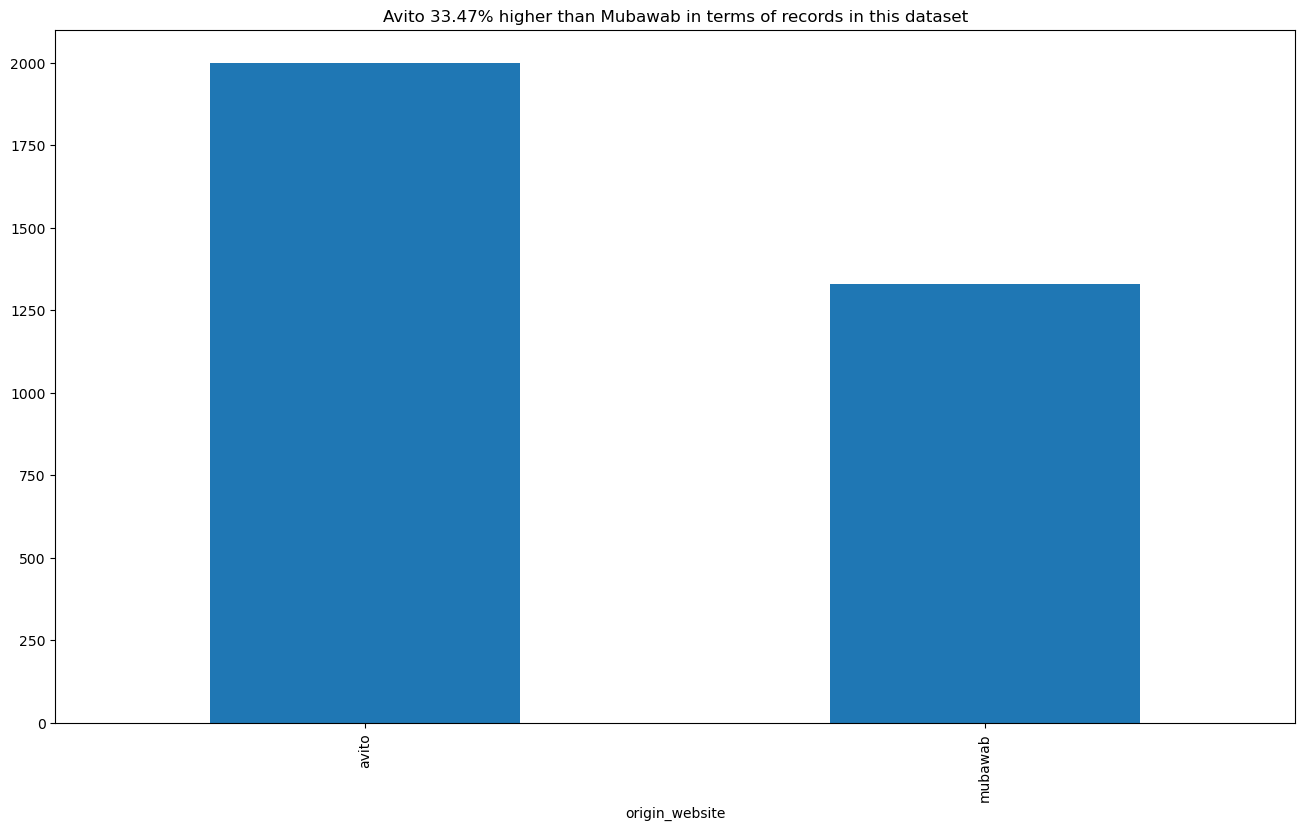

In [214]:
mh_dataset['origin_website'].value_counts().plot(kind='bar')
plt.title(f"{highest_count['name'].capitalize()} {round(r, 2)}% higher than {lowest_count['name'].capitalize()} in terms of records in this dataset")
plt.show()

## 3.5 'title' column cleaning

**Summary :**

- Added a new column 'the surface area of the property from the title (m²)' based on current column 'title'.
- Analyse all titles by counting the most appeared words.
- Added a new column 'announcement type from the title' based on current column 'title'.
- Analyse the new column 'the surface area of the property from the title (m²)', and gather new insight from it.
- Adde new column 'size of the property' (very small, small, average, big, very big) based on current column 'title'.

In [215]:
mh_dataset['title']

0              Appartement de 100m² en vente Noor Asilah 
1         Luxueux studio à vendre 63m² La Ferme Bretonne 
2         Studio de Luxe à Palmier 1ère étage, Ascenseur 
3                               Vente appartement rénové 
4                               Bel appartement spacieux 
                              ...                        
3324                              ferme en Vente barashwa
3325                    Appartements familiale à côté CHU
3326                PENTHOUSE à louer à MARINA CASABLANCA
3327         Appartement haut standing 70 m² à Casablanca
3328    Maison 2 Niveaux 121m2 Sidi Hajjaj Tit Mellil ...
Name: title, Length: 3329, dtype: object

### 3.5 - 1/ Counting Unique Words :

I will create a "word counts" dictionary which will contain all ***unique words*** as keys and ***their occurrences*** as values.

This step will give us an ***overall overview*** of the titles in this dataset.

In [216]:
def get_unique_words(list, stop_words):
    # Combine all texts into one
    combined_text = " ".join(list)

    # Converte text to lowercase to ensure word comparison is not case sensitive + delete any character that is not a letter, number, or space.
    combined_text = re.sub(r'[^\w\s]', ' ', combined_text.lower())

    # Retrieve all words in the test
    words = combined_text.split()

    # Count the occurrences of each word
    unique_words_dict = Counter(words)

    filtered_dict = {key: value for key, value in unique_words_dict.items() if key not in stop_words}
    
    return filtered_dict

In [217]:
unique_words_from_titles = dict(get_unique_words(list(mh_dataset['title']), all_stop_words))

In [218]:
len(unique_words_from_titles)

2473

In [219]:
unique_words_from_titles = {k: v for k, v in unique_words_from_titles.items() if v>1 and not has_numbers(k) and k.capitalize() not in MOROCCAN_CITIES }

In [220]:
len(unique_words_from_titles)

783

In [221]:
sorted_unique_words_from_titles = sorted(unique_words_from_titles.items(), key=lambda kv: kv[1], reverse=True)

In [222]:
sorted_unique_words_from_titles

[('appartement', 1989),
 ('vendre', 1096),
 ('m²', 886),
 ('chambres', 436),
 ('vente', 427),
 ('louer', 303),
 ('villa', 220),
 ('bel', 185),
 ('meublé', 182),
 ('studio', 149),
 ('terrain', 142),
 ('location', 134),
 ('surface', 129),
 ('hay', 110),
 ('résidence', 95),
 ('centre', 92),
 ('superbe', 85),
 ('neuf', 79),
 ('el', 73),
 ('standing', 72),
 ('شقة', 72),
 ('appart', 71),
 ('bureau', 70),
 ('al', 69),
 ('tanger', 67),
 ('superficie', 65),
 ('ville', 65),
 ('piscine', 64),
 ('vend', 62),
 ('terrasse', 61),
 ('californie', 59),
 ('haut', 56),
 ('totale', 55),
 ('belles', 54),
 ('appartements', 53),
 ('للبيع', 52),
 ('magnifique', 51),
 ('achat', 50),
 ('quartier', 50),
 ('vue', 49),
 ('belle', 48),
 ('bien', 48),
 ('très', 48),
 ('للكراء', 48),
 ('pièces', 47),
 ('luxe', 46),
 ('maison', 45),
 ('duplex', 44),
 ('vide', 44),
 ('magasin', 43),
 ('jardin', 40),
 ('sidi', 40),
 ('agréables', 38),
 ('hôpitaux', 38),
 ('agdal', 38),
 ('parking', 38),
 ('commercial', 38),
 ('guéliz', 

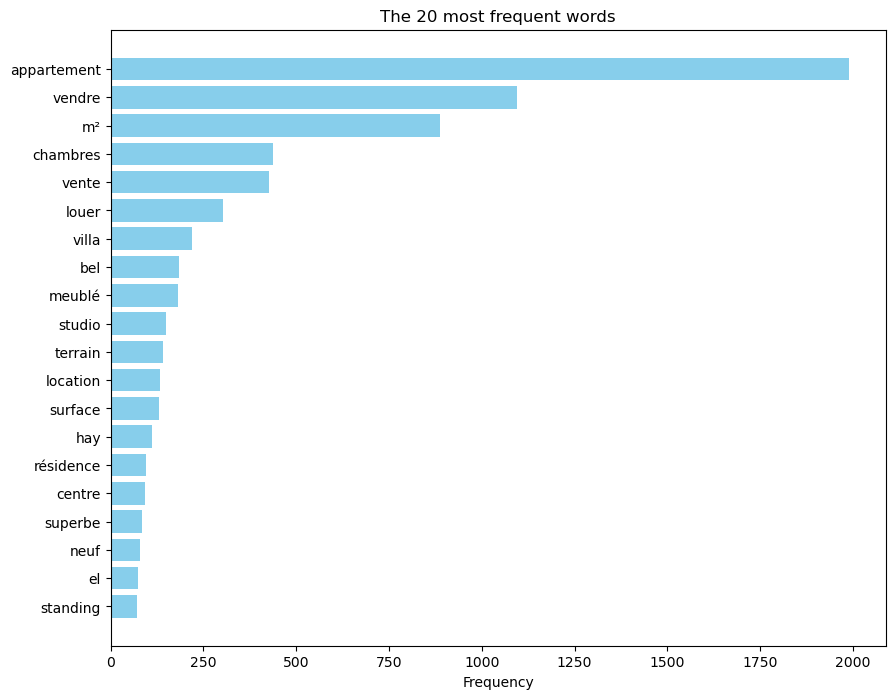

In [223]:
words, frequencies = zip(*sorted_unique_words_from_titles[:20])  # Les 20 mots les plus fréquents

plt.figure(figsize=(10, 8))
plt.barh(words, frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.title('The 20 most frequent words')
plt.gca().invert_yaxis()
plt.show()

In [224]:
from wordcloud import WordCloud

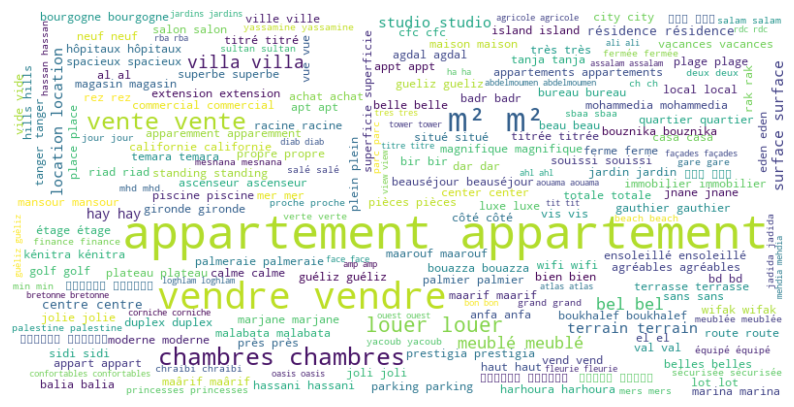

In [225]:
wordcloud_text = ' '.join([word for word, freq in sorted_unique_words_from_titles for _ in range(freq)])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [226]:
specific_stop_words = {"m²", "bel", "al", "el", "très", "bien", "hay","haut","belles","quartier","eden","vue","belle","badr","sidi","db","rak","racine","في","pièces","magnifique","beau","mhd","val","agréable","hills","lot","apparemment","plein","route","jnane"}

In [227]:
sorted_unique_words_from_titles = {key: value for key, value in dict(sorted_unique_words_from_titles).items() if key not in specific_stop_words}
sorted_unique_words_from_titles = sorted(sorted_unique_words_from_titles.items(), key=lambda kv: kv[1], reverse=True)

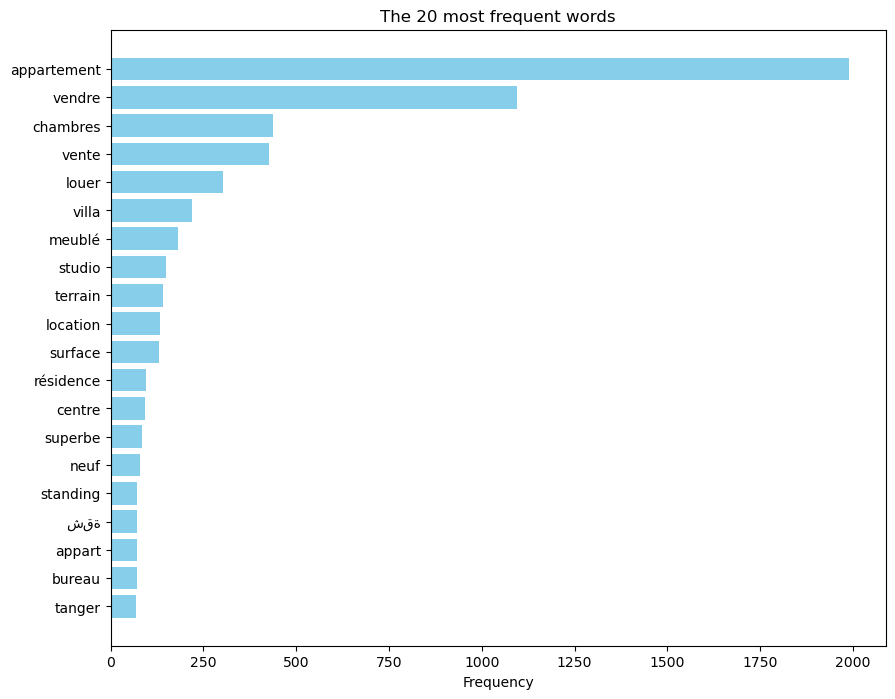

In [228]:
words, frequencies = zip(*sorted_unique_words_from_titles[:20])  # Les 20 mots les plus fréquents

plt.figure(figsize=(10, 8))
plt.barh(words, frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.title('The 20 most frequent words')
plt.gca().invert_yaxis()
plt.show()

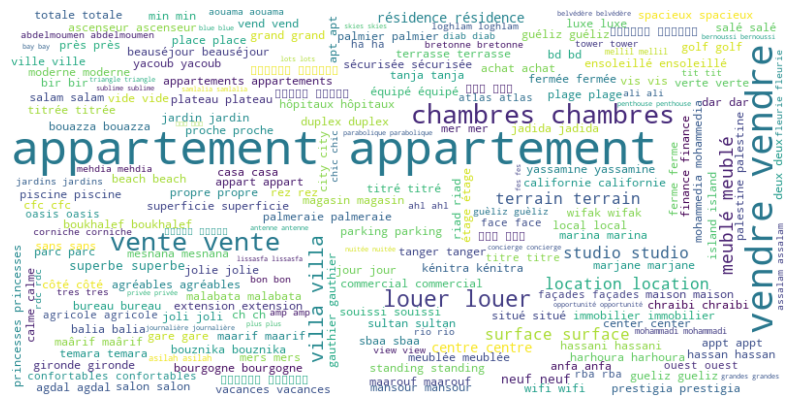

In [229]:
wordcloud_text = ' '.join([word for word, freq in sorted_unique_words_from_titles for _ in range(freq)])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 3.5 - 2/ Extract the type of the ad (vente/louer/rental/sell/...) from the title :

In [230]:
sorted_unique_words_from_titles

[('appartement', 1989),
 ('vendre', 1096),
 ('chambres', 436),
 ('vente', 427),
 ('louer', 303),
 ('villa', 220),
 ('meublé', 182),
 ('studio', 149),
 ('terrain', 142),
 ('location', 134),
 ('surface', 129),
 ('résidence', 95),
 ('centre', 92),
 ('superbe', 85),
 ('neuf', 79),
 ('standing', 72),
 ('شقة', 72),
 ('appart', 71),
 ('bureau', 70),
 ('tanger', 67),
 ('superficie', 65),
 ('ville', 65),
 ('piscine', 64),
 ('vend', 62),
 ('terrasse', 61),
 ('californie', 59),
 ('totale', 55),
 ('appartements', 53),
 ('للبيع', 52),
 ('achat', 50),
 ('للكراء', 48),
 ('luxe', 46),
 ('maison', 45),
 ('duplex', 44),
 ('vide', 44),
 ('magasin', 43),
 ('jardin', 40),
 ('agréables', 38),
 ('hôpitaux', 38),
 ('agdal', 38),
 ('parking', 38),
 ('commercial', 38),
 ('guéliz', 36),
 ('temara', 36),
 ('local', 36),
 ('gauthier', 35),
 ('riad', 35),
 ('bourgogne', 35),
 ('place', 35),
 ('salon', 34),
 ('bd', 34),
 ('mer', 32),
 ('bouznika', 31),
 ('titré', 31),
 ('vacances', 31),
 ('mohammedia', 30),
 ('vis',

In [231]:
ad_type_normalisation = {
  "sell": "sell",
  "sole": "sell",
  "selling": "sell",
  "vend": "sell",
  "vendre": "sell",
  "rental": "rental",
  "renting": "rental",
  "location": "rental",
  "louer": "rental",
  "كراء": "rental",
  "loue": "rental",
}

In [232]:
def gather_announcement_type(title, dictionary):
    words = title.lower().split()
    for word in words:
        normalized_word = dictionary.get(word, None)
        if normalized_word:
            return normalized_word
    return 'others'

In [233]:
mh_dataset['ad category from title'] = mh_dataset['title'].apply(lambda x: gather_announcement_type(x, ad_type_normalisation))

<Axes: xlabel='ad category from title'>

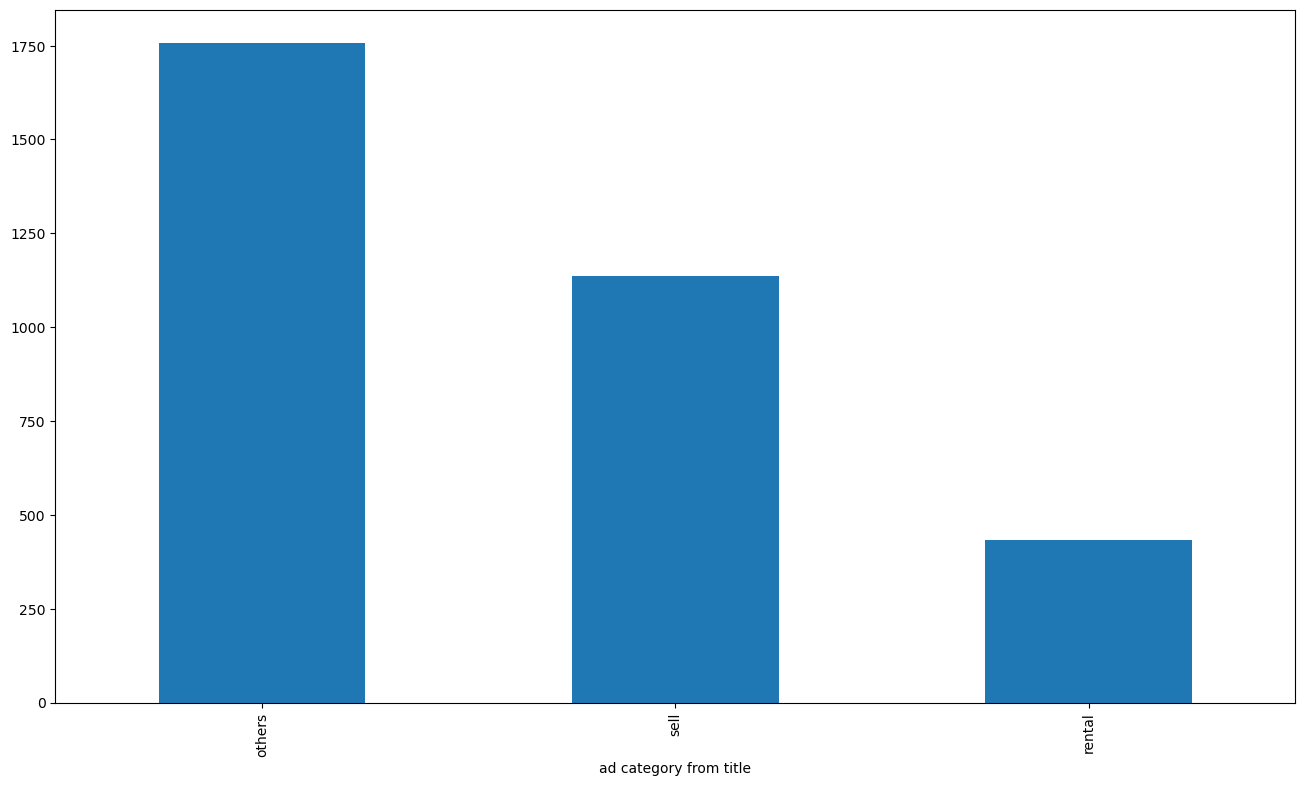

In [234]:
mh_dataset['ad category from title'].value_counts().plot(kind="bar")

We need more informations from other columns to identify the category of others type of ads.

### 3.5 - 3/ Extract the surface area of the property from the title :

In [235]:
property_surface_pattern = r'\b(\d+)\s*m²\b'
def return_property_surface_from_text(text):
    match = re.search(property_surface_pattern, text)
    if match:
        # return match.group(0).split("m²")[0].replace(" ", "")+" m²" # if we want to keep the unit of measurement (m²).
        return int(match.group(0).split("m²")[0].replace(" ", ""))
    else:
        return None

In [236]:
mh_dataset['the surface area of the property from the title (m²)'] = mh_dataset['title'].apply(lambda x: return_property_surface_from_text(x))

In [237]:
mh_dataset['the surface area of the property from the title (m²)']

0       100.0
1        63.0
2         NaN
3         NaN
4         NaN
        ...  
3324      NaN
3325      NaN
3326      NaN
3327     70.0
3328      NaN
Name: the surface area of the property from the title (m²), Length: 3329, dtype: float64

In [238]:
len(mh_dataset['the surface area of the property from the title (m²)'][mh_dataset['the surface area of the property from the title (m²)'].isna() == True])

2218

In [239]:
len(mh_dataset['the surface area of the property from the title (m²)'][mh_dataset['the surface area of the property from the title (m²)'].isna() == False])

1111

In [240]:
mh_dataset[['the surface area of the property from the title (m²)', 'origin_website']].head(3)

,the surface area of the property from the title (m²),origin_website
0,100.0,mubawab
1,63.0,mubawab
2,NaN,mubawab


In [241]:
sub_set = mh_dataset[['the surface area of the property from the title (m²)', 'origin_website']]

In [242]:
sub_set['the surface area of the property from the title (m²)'].describe()

count    1111.000000
mean      159.857786
std       467.981947
min         4.000000
25%        76.000000
50%        98.000000
75%       133.500000
max      9500.000000
Name: the surface area of the property from the title (m²), dtype: float64

In [243]:
sub_set = sub_set[sub_set['the surface area of the property from the title (m²)']  < 1000 ]

C:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


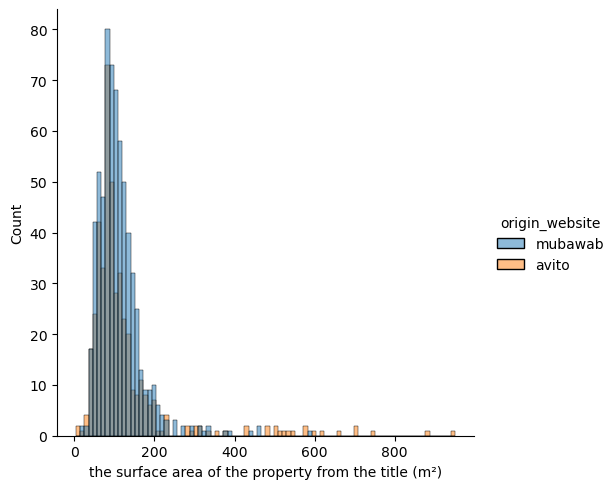

In [244]:
sns.displot(sub_set, x='the surface area of the property from the title (m²)', hue='origin_website')

In [245]:
sub_set = sub_set[sub_set['the surface area of the property from the title (m²)']  < 300 ]

C:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'The majority of properties have a surface area between 50 m² and 175 m²')

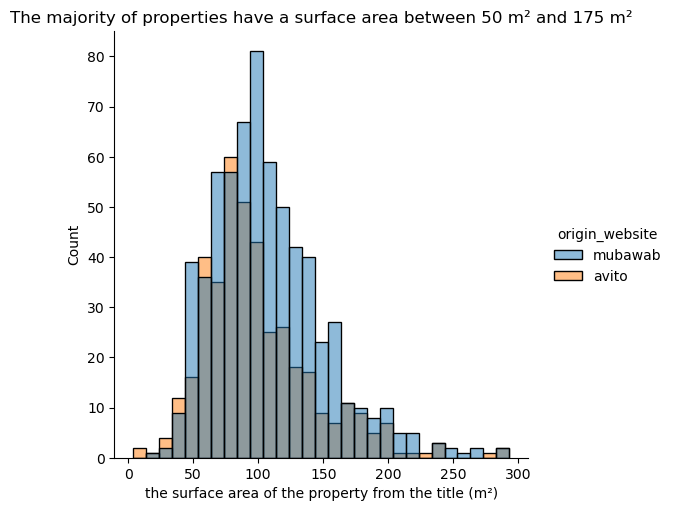

In [246]:
sns.displot(sub_set, x='the surface area of the property from the title (m²)', hue='origin_website')
plt.title("The majority of properties have a surface area between 50 m² and 175 m²")

C:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'The majority of properties have a surface area between 50 m² and 175 m²')

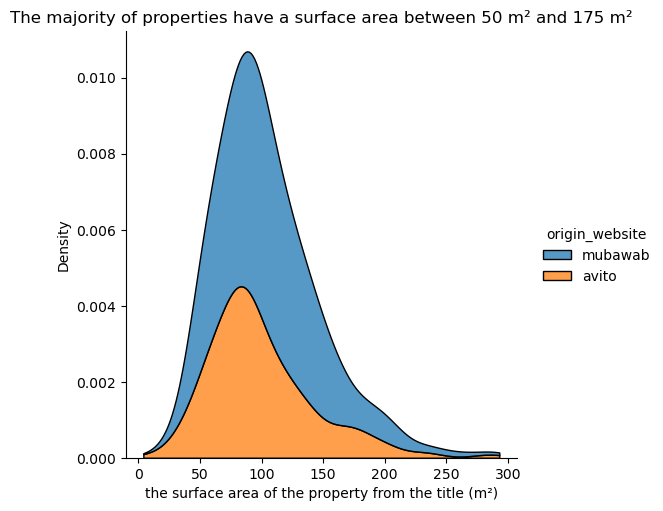

In [247]:
# Kernel density estimation
sns.displot(sub_set, x='the surface area of the property from the title (m²)', hue='origin_website', kind="kde", multiple="stack", cut=0)
plt.title("The majority of properties have a surface area between 50 m² and 175 m²")

## 3.6 'publication_date' column cleaning

**Summary :**

- Added year, month, day of publication columns based on current column 'publication_date' and 'insert_date'.

In [248]:
mh_dataset['publication_date']

0       Publié aujourdhui
1       Publié aujourdhui
2       Publié aujourdhui
3       Publié aujourdhui
4       Publié aujourdhui
              ...        
3324      il y a 5 heures
3325      il y a 5 heures
3326      il y a 5 heures
3327      il y a 5 heures
3328      il y a 5 heures
Name: publication_date, Length: 3329, dtype: object

In [249]:
mh_dataset['publication_date'].unique()

array(['Publié aujourdhui', 'Publié il y a 1 jour',
       'Publié il y a 2 jours', 'Publié il y a 4 jours',
       'Publié il y a 3 jours', 'Publié il y a 5 jours',
       'Publié il y a 1 semaine', 'il y a 8 minutes', 'il y a 9 minutes',
       'il y a 21 minutes', 'il y a 26 minutes', 'il y a 20 minutes',
       'il y a 24 minutes', 'il y a 18 minutes', 'il y a 16 minutes',
       'il y a 33 minutes', 'il y a 28 minutes', 'il y a 29 minutes',
       'il y a 31 minutes', 'il y a 30 minutes', 'il y a 36 minutes',
       'il y a 37 minutes', 'il y a 41 minutes', 'il y a 35 minutes',
       'il y a 32 minutes', 'il y a 43 minutes', 'il y a 40 minutes',
       'il y a 45 minutes', 'il y a 39 minutes', 'il y a 42 minutes',
       'il y a 50 minutes', 'il y a 44 minutes', 'il y a 57 minutes',
       'il y a 56 minutes', 'il y a 55 minutes', 'il y a 59 minutes',
       'il y a 54 minutes', 'il y a 58 minutes', 'il y a 52 minutes',
       'il y a 1 heure', 'il y a 53 minutes', 'il y a 2 heur

In [250]:
def convert_to_datetime(pub_date, insert_date):
    current_date = datetime.strptime(insert_date, "%Y-%m-%d")
    current_date = current_date + timedelta(hours=23, minutes=59)
    
    if 'aujourdhui' in pub_date:
        return current_date
    
    num_match = re.search(r'\d+', pub_date)
    if not num_match:
        return np.nan
    
    num = int(num_match.group())
    
    if 'minute' in pub_date:
        return current_date - timedelta(minutes=num)
    elif 'heure' in pub_date or 'hour' in pub_date:
        return current_date - timedelta(hours=num)
    elif 'jour' in pub_date or 'day' in pub_date:
        return current_date - timedelta(days=num)
    elif 'semaine' in pub_date or 'week' in pub_date:
        return current_date - timedelta(weeks=num)
    else:
        return np.nan

In [251]:
mh_dataset.apply(lambda x: convert_to_datetime(x['publication_date'], x['insert_date']), axis=1)

0      2024-05-17 23:59:00
1      2024-05-17 23:59:00
2      2024-05-17 23:59:00
3      2024-05-17 23:59:00
4      2024-05-17 23:59:00
               ...        
3324   2024-05-21 18:59:00
3325   2024-05-21 18:59:00
3326   2024-05-21 18:59:00
3327   2024-05-21 18:59:00
3328   2024-05-21 18:59:00
Length: 3329, dtype: datetime64[ns]

In [252]:
mh_dataset['publication_date'] = mh_dataset.apply(lambda x: convert_to_datetime(x['publication_date'], x['insert_date']), axis=1)

In [253]:
mh_dataset['year of publication'] = mh_dataset['publication_date'].apply(lambda x: x.year)
mh_dataset['month of publication'] = mh_dataset['publication_date'].apply(lambda x: x.month)
mh_dataset['day of publication'] = mh_dataset['publication_date'].apply(lambda x: x.day)

In [254]:
mh_dataset

,advertisement_url,title,publication_date,price,location,description,complete_description,features_list,insert_date,origin_website,ad category from title,the surface area of the property from the title (m²),year of publication,month of publication,day of publication
0,https://www.mubawab.ma/fr/pa/7476862/apparteme...,Appartement de 100m² en vente Noor Asilah,2024-05-17 23:59:00,Prix à consulter,Asilah,100 m² ;3 Pièces;2 Chambres;2 Salles de bains,Si vous êtes à la recherche d’une résidence ca...,Type de bien;Appartement;Etat ;Nouveau;Standin...,2024-05-17,mubawab,others,100.0,2024,5,17
1,https://www.mubawab.ma/fr/a/7915969/luxueux-st...,Luxueux studio à vendre 63m² La Ferme Bretonne,2024-05-17 23:59:00,1 450 000 DH,Ferme Bretonne (Hay Arraha) à Casablanca,63 m² ;2 Pièces;1 Chambre;1 Salle de bain,Studio très haut standing de 63m² dont 9m² de ...,Type de bien;Appartement;Etat ;Nouveau;Etat du...,2024-05-17,mubawab,sell,63.0,2024,5,17
2,https://www.mubawab.ma/fr/a/7916043/studio-de-...,"Studio de Luxe à Palmier 1ère étage, Ascenseur",2024-05-17 23:59:00,7 800 DH,Palmier à Casablanca,62 m² ;2 Pièces;1 Chambre;1 Salle de bain,"studio de standing, idéalement situé au premie...",Type de bien;Appartement;Etat ;Nouveau;Etat du...,2024-05-17,mubawab,others,NaN,2024,5,17
3,https://www.mubawab.ma/fr/a/7916424/vente-appa...,Vente appartement rénové,2024-05-17 23:59:00,1 500 000 DH,Val Fleury à Casablanca,124 m² ;5 Pièces;3 Chambres;1 Salle de bain,Excellent appartement voisinage agréable pour ...,Type de bien;Appartement;Etat ;Bon état;Étage ...,2024-05-17,mubawab,others,NaN,2024,5,17
4,https://www.mubawab.ma/fr/a/7916833/bel-appart...,Bel appartement spacieux,2024-05-17 23:59:00,1 200 000 DH,Route de Safi à Marrakech,103 m² ;4 Pièces;2 Chambres;1 Salle de bain,Il est dans le quartier rouidate à quelques mi...,Type de bien;Appartement;Etat ;Bon état;Etat d...,2024-05-17,mubawab,others,NaN,2024,5,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3324,https://www.avito.ma/fr/khemisset/terrains_et_...,ferme en Vente barashwa,2024-05-21 18:59:00,Prix non spécifié,Khemisset,NaN,propriété titrée située à 40 km de rabat à par...,"Type;Terrains et Fermes, à vendre;Secteur;Tout...",2024-05-21,avito,others,NaN,2024,5,21
3325,https://www.avito.ma/fr/iris/locations_de_vaca...,Appartements familiale à côté CHU,2024-05-21 18:59:00,250 DH /Nuit,Oujda,NaN,Salam Je vous propose un appartement pour les ...,"Type;Locations de vacances, à louer;Secteur;Ir...",2024-05-21,avito,others,NaN,2024,5,21
3326,https://www.avito.ma/fr/a%C3%AFn_diab/appartem...,PENTHOUSE à louer à MARINA CASABLANCA,2024-05-21 18:59:00,45 000 DH,Casablanca,NaN,PENTHOUSE à louer à MARINA CASABLANCA,"Type;Appartements, à louer;Secteur;Aïn Diab;Sa...",2024-05-21,avito,rental,NaN,2024,5,21
3327,https://www.avito.ma/fr/sidi_maarouf/apparteme...,Appartement haut standing 70 m² à Casablanca,2024-05-21 18:59:00,880 000 DH,Casablanca,NaN,Complexe résidentiel sécurisé avec piscine d'a...,"Type;Appartements, à vendre;Secteur;Sidi Maaro...",2024-05-21,avito,others,70.0,2024,5,21


## 3.7 'price' column cleaning

**Summary :**

- add three new columns 'property price', 'price currency', 'ad type' and 'price per priod (for rental ad)' based on the current one.

In [255]:
mh_dataset['price']

0        Prix à consulter 
1            1 450 000 DH 
2                7 800 DH 
3            1 500 000 DH 
4            1 200 000 DH 
               ...        
3324     Prix non spécifié
3325          250 DH /Nuit
3326             45 000 DH
3327            880 000 DH
3328          1 200 000 DH
Name: price, Length: 3329, dtype: object

In [256]:
mh_dataset['price'].unique()

array([' Prix à consulter ', '1 450 000 DH ', '7 800 DH ',
       '1 500 000 DH ', '1 200 000 DH ', '450 000 DH ', '1 020 000 DH ',
       '2 820 000 DH ', '1 480 000 DH ', '3 200 000 DH ', '2 670 000 DH ',
       '1 162 000 DH ', '928 800 DH ', '250 000 DH ', '1 300 000 DH ',
       '1 600 000 DH ', '2 795 000 DH ', '1 675 000 DH ', '1 092 000 DH ',
       '1 750 000 DH ', '720 000 DH ', '372 000 DH ', '1 260 000 DH ',
       '2 700 000 DH ', '1 400 000 DH ', '2 440 000 DH ', '675 000 DH ',
       '740 000 DH ', '1 110 000 DH ', '500 000 DH ', '1 280 000 DH ',
       '1 015 000 DH ', '1 140 000 DH ', '2 180 000 DH ', '790 000 DH ',
       '1 350 000 DH ', '2 550 000 DH ', '2 200 000 DH ', '3 542 000 DH ',
       '2 850 000 DH ', '1 196 000 DH ', '1 420 000 DH ', '830 000 DH ',
       '1 120 000 DH ', '430 000 DH ', '1 077 000 DH ', '750 000 DH ',
       '1 083 800 DH ', '1 375 000 DH ', '820 000 DH ', '650 000 DH ',
       '3 670 000 DH ', '460 000 DH ', '800 000 DH ', '690 000 DH ',


As we have noticed, there are multiple forms of price descriptions in our dataset:

- **Regular Form**: The price of the property followed by its currency (e.g., "1000 DH").

- **Rental Form**: For rental ads, the price may be specified per night. This can appear directly like the regular form (e.g., "150 DH") or with an additional string at the end of the price (e.g., "150 DH/Nuit" or "150 DH/Night").

- **Unspecified Price**: Sometimes, the ad owner does not specify the price, either for sale or rental, and this is indicated by strings like "Prix non spécifié" or left blank ("").

To handle these variations, we will standardize the price descriptions in our dataset, ensuring consistency and improving data quality.

In [257]:
def extract_price(price_description):
    
    # Patterns to match each different price descriptions
    regular_pattern = re.compile(r'\s*([\d\s]+)\s*(\w+)\s*', re.IGNORECASE)
    rental_pattern = re.compile(r'\s*([\d\s]+)\s*(\w+)\s*/\s*(\w+)\s*', re.IGNORECASE)
    unspecified_patterns = [re.compile(r'\s*prix\s*non\s*spécifié\s*', re.IGNORECASE),
                            re.compile(r'\s*non\s*spécifié\s*', re.IGNORECASE),
                            re.compile(r'\s*price\s*not\s*specified\s*', re.IGNORECASE),
                            re.compile(r'\s*not\s*specified\s*', re.IGNORECASE),
                            re.compile(r'\s*prix\s*à\s*consulter\s*', re.IGNORECASE),
                            re.compile(r'\s*gratuit\s*', re.IGNORECASE),
                            re.compile(r'\s*free\s*', re.IGNORECASE),
                            re.compile(r'^\s*$')]

    # Check for unspecified price first
    for pattern in unspecified_patterns:
        if pattern.match(price_description):
            return {'price': None, 'currency': None, 'type': 'unspecified'}

    # Check for rental form
    rental_match = rental_pattern.match(price_description)
    if rental_match:
        price, currency, period = rental_match.groups()
        return {'price': int(price.replace(" ", "")), 'currency': currency, 'type': 'rental', 'period': period}

    # Check for regular form
    regular_match = regular_pattern.match(price_description)
    if regular_match:
        price, currency = regular_match.groups()
        return {'price': int(price.replace(" ", "")), 'currency': currency, 'type': 'sell'}

    # If no match, return None (this handles unexpected formats)
    return {'price': None, 'currency': None, 'type': 'unknown'}

In [258]:
mh_dataset['price']

0        Prix à consulter 
1            1 450 000 DH 
2                7 800 DH 
3            1 500 000 DH 
4            1 200 000 DH 
               ...        
3324     Prix non spécifié
3325          250 DH /Nuit
3326             45 000 DH
3327            880 000 DH
3328          1 200 000 DH
Name: price, Length: 3329, dtype: object

In [259]:
mh_dataset['price'].apply(lambda x: extract_price(x)).tolist()

[{'price': None, 'currency': None, 'type': 'unspecified'},
 {'price': 1450000, 'currency': 'DH', 'type': 'sell'},
 {'price': 7800, 'currency': 'DH', 'type': 'sell'},
 {'price': 1500000, 'currency': 'DH', 'type': 'sell'},
 {'price': 1200000, 'currency': 'DH', 'type': 'sell'},
 {'price': 450000, 'currency': 'DH', 'type': 'sell'},
 {'price': 1020000, 'currency': 'DH', 'type': 'sell'},
 {'price': 2820000, 'currency': 'DH', 'type': 'sell'},
 {'price': 1480000, 'currency': 'DH', 'type': 'sell'},
 {'price': 3200000, 'currency': 'DH', 'type': 'sell'},
 {'price': 2670000, 'currency': 'DH', 'type': 'sell'},
 {'price': 1162000, 'currency': 'DH', 'type': 'sell'},
 {'price': None, 'currency': None, 'type': 'unspecified'},
 {'price': 928800, 'currency': 'DH', 'type': 'sell'},
 {'price': 250000, 'currency': 'DH', 'type': 'sell'},
 {'price': 1300000, 'currency': 'DH', 'type': 'sell'},
 {'price': 1600000, 'currency': 'DH', 'type': 'sell'},
 {'price': 2795000, 'currency': 'DH', 'type': 'sell'},
 {'price

In [260]:
extracted_prices = pd.DataFrame(mh_dataset['price'].apply(lambda x: extract_price(x)).tolist())
extracted_prices.columns = ['property price', 'price currency', 'ad type', 'price per priod (for rental ad)']
extracted_prices

,property price,price currency,ad type,price per priod (for rental ad)
0,NaN,None,unspecified,NaN
1,1450000.0,DH,sell,NaN
2,7800.0,DH,sell,NaN
3,1500000.0,DH,sell,NaN
4,1200000.0,DH,sell,NaN
...,...,...,...,...
3324,NaN,None,unspecified,NaN
3325,250.0,DH,rental,Nuit
3326,45000.0,DH,sell,NaN
3327,880000.0,DH,sell,NaN


In [261]:
mh_dataset = mh_dataset.join(extracted_prices)
mh_dataset

,advertisement_url,title,publication_date,price,location,description,complete_description,features_list,insert_date,origin_website,ad category from title,the surface area of the property from the title (m²),year of publication,month of publication,day of publication,property price,price currency,ad type,price per priod (for rental ad)
0,https://www.mubawab.ma/fr/pa/7476862/apparteme...,Appartement de 100m² en vente Noor Asilah,2024-05-17 23:59:00,Prix à consulter,Asilah,100 m² ;3 Pièces;2 Chambres;2 Salles de bains,Si vous êtes à la recherche d’une résidence ca...,Type de bien;Appartement;Etat ;Nouveau;Standin...,2024-05-17,mubawab,others,100.0,2024,5,17,NaN,None,unspecified,NaN
1,https://www.mubawab.ma/fr/a/7915969/luxueux-st...,Luxueux studio à vendre 63m² La Ferme Bretonne,2024-05-17 23:59:00,1 450 000 DH,Ferme Bretonne (Hay Arraha) à Casablanca,63 m² ;2 Pièces;1 Chambre;1 Salle de bain,Studio très haut standing de 63m² dont 9m² de ...,Type de bien;Appartement;Etat ;Nouveau;Etat du...,2024-05-17,mubawab,sell,63.0,2024,5,17,1450000.0,DH,sell,NaN
2,https://www.mubawab.ma/fr/a/7916043/studio-de-...,"Studio de Luxe à Palmier 1ère étage, Ascenseur",2024-05-17 23:59:00,7 800 DH,Palmier à Casablanca,62 m² ;2 Pièces;1 Chambre;1 Salle de bain,"studio de standing, idéalement situé au premie...",Type de bien;Appartement;Etat ;Nouveau;Etat du...,2024-05-17,mubawab,others,NaN,2024,5,17,7800.0,DH,sell,NaN
3,https://www.mubawab.ma/fr/a/7916424/vente-appa...,Vente appartement rénové,2024-05-17 23:59:00,1 500 000 DH,Val Fleury à Casablanca,124 m² ;5 Pièces;3 Chambres;1 Salle de bain,Excellent appartement voisinage agréable pour ...,Type de bien;Appartement;Etat ;Bon état;Étage ...,2024-05-17,mubawab,others,NaN,2024,5,17,1500000.0,DH,sell,NaN
4,https://www.mubawab.ma/fr/a/7916833/bel-appart...,Bel appartement spacieux,2024-05-17 23:59:00,1 200 000 DH,Route de Safi à Marrakech,103 m² ;4 Pièces;2 Chambres;1 Salle de bain,Il est dans le quartier rouidate à quelques mi...,Type de bien;Appartement;Etat ;Bon état;Etat d...,2024-05-17,mubawab,others,NaN,2024,5,17,1200000.0,DH,sell,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3324,https://www.avito.ma/fr/khemisset/terrains_et_...,ferme en Vente barashwa,2024-05-21 18:59:00,Prix non spécifié,Khemisset,NaN,propriété titrée située à 40 km de rabat à par...,"Type;Terrains et Fermes, à vendre;Secteur;Tout...",2024-05-21,avito,others,NaN,2024,5,21,NaN,None,unspecified,NaN
3325,https://www.avito.ma/fr/iris/locations_de_vaca...,Appartements familiale à côté CHU,2024-05-21 18:59:00,250 DH /Nuit,Oujda,NaN,Salam Je vous propose un appartement pour les ...,"Type;Locations de vacances, à louer;Secteur;Ir...",2024-05-21,avito,others,NaN,2024,5,21,250.0,DH,rental,Nuit
3326,https://www.avito.ma/fr/a%C3%AFn_diab/appartem...,PENTHOUSE à louer à MARINA CASABLANCA,2024-05-21 18:59:00,45 000 DH,Casablanca,NaN,PENTHOUSE à louer à MARINA CASABLANCA,"Type;Appartements, à louer;Secteur;Aïn Diab;Sa...",2024-05-21,avito,rental,NaN,2024,5,21,45000.0,DH,sell,NaN
3327,https://www.avito.ma/fr/sidi_maarouf/apparteme...,Appartement haut standing 70 m² à Casablanca,2024-05-21 18:59:00,880 000 DH,Casablanca,NaN,Complexe résidentiel sécurisé avec piscine d'a...,"Type;Appartements, à vendre;Secteur;Sidi Maaro...",2024-05-21,avito,others,70.0,2024,5,21,880000.0,DH,sell,NaN


In [262]:
del mh_dataset['price']

## 3.8 'location' column cleaning

**Summary :**

- Clean current column.
- Visualize data + insight gathering.

In [263]:
mh_dataset['location']

0                                         Asilah 
1       Ferme Bretonne (Hay Arraha) à Casablanca 
2                           Palmier à Casablanca 
3                        Val Fleury à Casablanca 
4                      Route de Safi à Marrakech 
                          ...                    
3324                                    Khemisset
3325                                        Oujda
3326                                   Casablanca
3327                                   Casablanca
3328                      Sidi Hajjaj Oued Hassar
Name: location, Length: 3329, dtype: object

In [264]:
mh_dataset['location'].unique()

array(['Asilah ', 'Ferme Bretonne (Hay Arraha) à Casablanca ',
       'Palmier à Casablanca ', 'Val Fleury à Casablanca ',
       'Route de Safi à Marrakech ', 'Route Amizmiz à Marrakech ',
       'Tanja Balia à Tanger ', 'Plage Oued Cherrat à Bouznika ',
       'Port à Casablanca ', 'Gauthier à Casablanca ',
       'Guéliz à Marrakech ', 'Centre à Tanger ',
       'Hay Mohammadi à Casablanca ', 'Bernoussi à Casablanca ',
       'Ennakhil (Palmeraie) à Marrakech ', 'Tamesna ',
       'Nassim 1 à Casablanca ', 'Centre Ville à Mohammedia ',
       'Casablanca ', 'Al Azhar à Casablanca ', 'Ghazoua à Essaouira ',
       'Nouaceur ', 'Ahl Loghlam (Hay Assalam) à Casablanca ',
       'Ain Chock à Casablanca ', 'Moujahidine à Tanger ', 'Zenata ',
       'Wafa à Mohammedia ', 'Marjane à Tanger ', 'Boukhalef à Tanger ',
       'Malabata à Tanger ', 'Tanger City Center à Tanger ',
       'Ain Amiyer à Fès ', "Triangle d'Or à Casablanca ",
       'Nassim 2 à Casablanca ', 'Hay Al Rajaa Fillah à R

In [265]:
def extract_city_from_location(location):
    if 'à' in location:
        return location.split('à')[-1].strip()
    else:
        return location.strip()

In [266]:
mh_dataset['location']

0                                         Asilah 
1       Ferme Bretonne (Hay Arraha) à Casablanca 
2                           Palmier à Casablanca 
3                        Val Fleury à Casablanca 
4                      Route de Safi à Marrakech 
                          ...                    
3324                                    Khemisset
3325                                        Oujda
3326                                   Casablanca
3327                                   Casablanca
3328                      Sidi Hajjaj Oued Hassar
Name: location, Length: 3329, dtype: object

In [267]:
mh_dataset['location'] = mh_dataset['location'].apply(lambda x: extract_city_from_location(x))

In [268]:
unique_cities = mh_dataset['location'].unique()
unique_cities

array(['Asilah', 'Casablanca', 'Marrakech', 'Tanger', 'Bouznika',
       'Tamesna', 'Mohammedia', 'Essaouira', 'Nouaceur', 'Zenata', 'Fès',
       'Rabat', 'Meknes', 'Oujda', 'Bouskoura', 'Martil', 'Tit Mellil',
       'Agadir', 'Kénitra', 'Dar Bouazza', 'Deroua', 'Safi', 'Sidi Rahal',
       'Tétouan', 'Benslimane', 'Berrechid', 'Harhoura', 'Temara',
       'Fnideq', 'Salé', 'El Jadida', 'Al Hoceima', 'Skhirat', 'Gueznaia',
       'Saïdia', 'Ain Attig', 'Sidi Rahal Chatai', 'Azemmour', "M'Diq",
       'El Menzeh', 'Had Soualem', 'Aïn Harrouda', 'Ifrane', 'Dakhla',
       'Meknassa Acharqia', 'El Mansouria', 'Errahma', 'Ait Melloul',
       'Oued Laou', 'Sidi Bouzid', 'Tnine Aglou', 'Meknès', 'Bir Jdid',
       'Taghazout', 'Béni Mellal', 'مراكش', 'Mehdia', 'Al Haouz',
       'Timoulilt', 'Khouribga', 'Tifelt', 'طنجة', 'Saidia',
       'Sidi Allal El Bahraoui', 'Nador', 'Fdalate',
       'Al Oioun Sidi Mellouk', 'Souk El Arbaa', 'Berkane', 'Tiznit',
       'Lamharza Essahel', 'Midelt',

In [269]:
city_normalize = {
"طنجة" : "Tanger",
"Meknes" : "Meknès",
"القنيطرة" : "Kénitra",
"تمارة" : "Temara",
"مراكش" : "Marrakech"
}

In [270]:
print(sum(mh_dataset['location'] == "طنجة"))
print(sum(mh_dataset['location'] == "Meknes"))
print(sum(mh_dataset['location'] == "القنيطرة"))
print(sum(mh_dataset['location'] == "تمارة"))
print(sum(mh_dataset['location'] == "مراكش"))

2
7
1
1
4


In [271]:
 mh_dataset['location'] = mh_dataset['location'].apply(lambda x: city_normalize[x] if x in city_normalize.keys() else x)

In [272]:
print(sum(mh_dataset['location'] == "طنجة"))
print(sum(mh_dataset['location'] == "Meknes"))
print(sum(mh_dataset['location'] == "القنيطرة"))
print(sum(mh_dataset['location'] == "تمارة"))
print(sum(mh_dataset['location'] == "مراكش"))

0
0
0
0
0


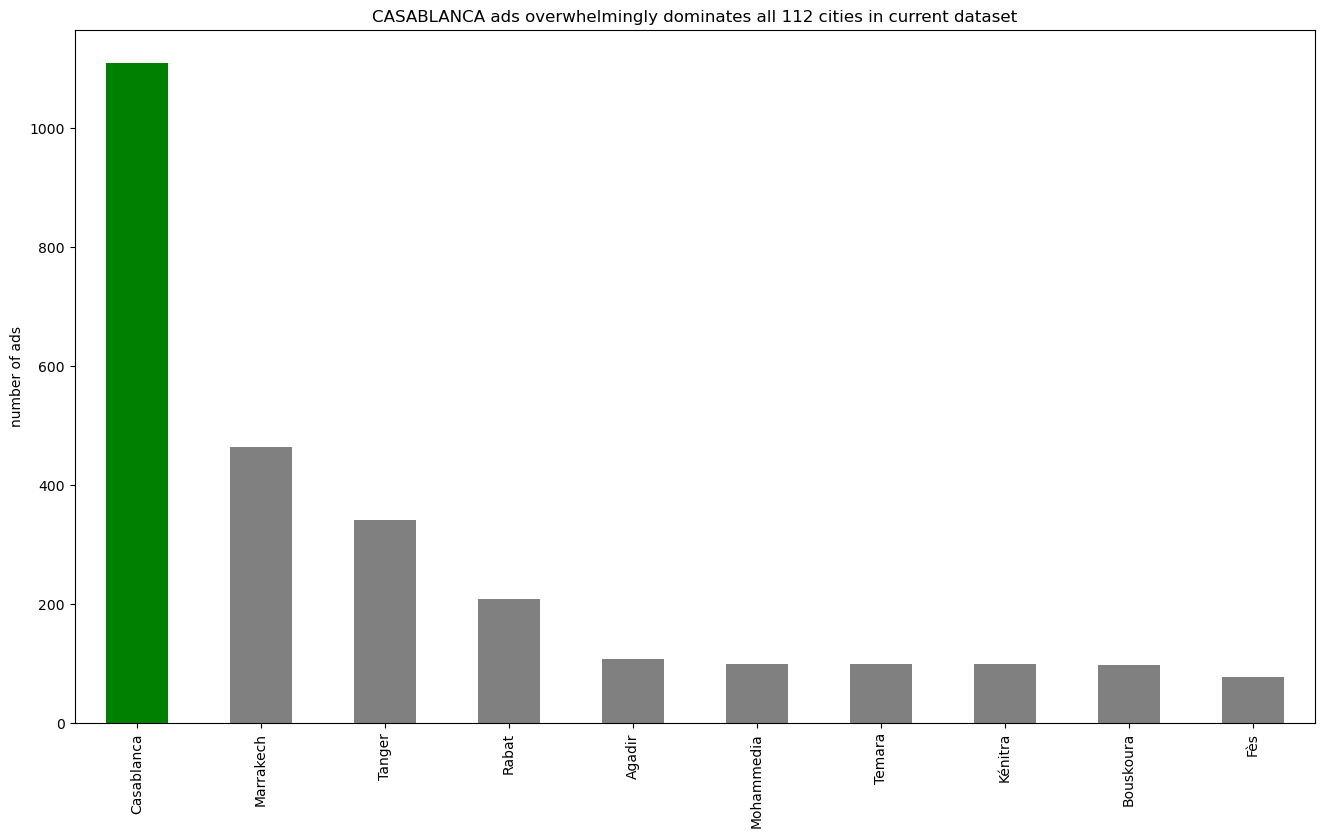

In [273]:
top_10_locations_in_current_dataset = mh_dataset['location'].value_counts().head(10)
colors = ['g'] + ['gray'] * (len(top_10_locations_in_current_dataset)-1)
top_10_locations_in_current_dataset.plot(kind="bar", xlabel='', ylabel='number of ads', color=colors)
plt.title(f'{top_10_locations_in_current_dataset.keys()[0].upper()} ads overwhelmingly dominates all {len(unique_cities)} cities in current dataset')
plt.show()

## 3.9 'description' column cleaning

**Summary :**

- Add two columns for property 'surface' and 'number of rooms'.

In [274]:
mh_dataset['description']

0        100 m² ;3 Pièces;2 Chambres;2 Salles de bains
1            63 m² ;2 Pièces;1 Chambre;1 Salle de bain
2            62 m² ;2 Pièces;1 Chambre;1 Salle de bain
3          124 m² ;5 Pièces;3 Chambres;1 Salle de bain
4          103 m² ;4 Pièces;2 Chambres;1 Salle de bain
                             ...                      
3324                                               NaN
3325                                               NaN
3326                                               NaN
3327                                               NaN
3328                                               NaN
Name: description, Length: 3329, dtype: object

I believe the most meaningful insights from this list of property descriptions are the first two information: 
the surface area and the number of rooms.

So, let's extract these two informations.

In [275]:
def extract_surface(description):
    if isinstance(description, str):
        return int(description.split(";")[0].split()[0])
    return None

In [276]:
mh_dataset['the surface area of the property from the description (m²)'] = mh_dataset['description'].apply(lambda x: extract_surface(x) )

In [277]:
mh_dataset['the surface area of the property from the description (m²)'].describe()

count    1330.000000
mean      112.930075
std        62.315688
min         1.000000
25%        76.000000
50%       100.000000
75%       135.750000
max       707.000000
Name: the surface area of the property from the description (m²), dtype: float64

let's compare the results with "the surface area of the property" which we've extracted from title

In [278]:
mh_dataset['the surface area of the property from the title (m²)'].describe()

count    1111.000000
mean      159.857786
std       467.981947
min         4.000000
25%        76.000000
50%        98.000000
75%       133.500000
max      9500.000000
Name: the surface area of the property from the title (m²), dtype: float64

75% of the records match, but there are outliers in the surface data extracted from titles. Therefore, we will remove these outliers and retain the most relevant surface data extracted from descriptions.

Note: For records from the Avito website, where we couldn't retrieve the property description, we will keep the surface data extracted from the title for those records.

In [279]:
def choose_property_surface(row_dataframe):
    if row_dataframe['origin_website'] == "mubawab":
        return row_dataframe['the surface area of the property from the description (m²)']
    return row_dataframe['the surface area of the property from the title (m²)']

In [280]:
mh_dataset['surface'] =  mh_dataset.apply(lambda row: choose_property_surface(row), axis=1)

In [281]:
del mh_dataset["the surface area of the property from the description (m²)"]
del mh_dataset["the surface area of the property from the title (m²)"]

C:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'The majority of properties have a surface area between 50 m² and 175 m²')

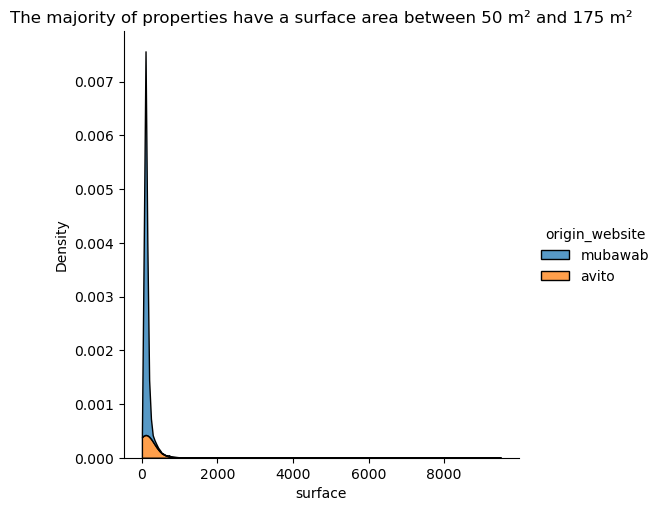

In [282]:
sns.displot(mh_dataset, x='surface', hue='origin_website', kind="kde", multiple="stack", cut=0)
plt.title("The majority of properties have a surface area between 50 m² and 175 m²")

In [283]:
subset = mh_dataset[mh_dataset['surface'] < 600]

C:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'The majority of properties have a surface area between 50 m² and 175 m²')

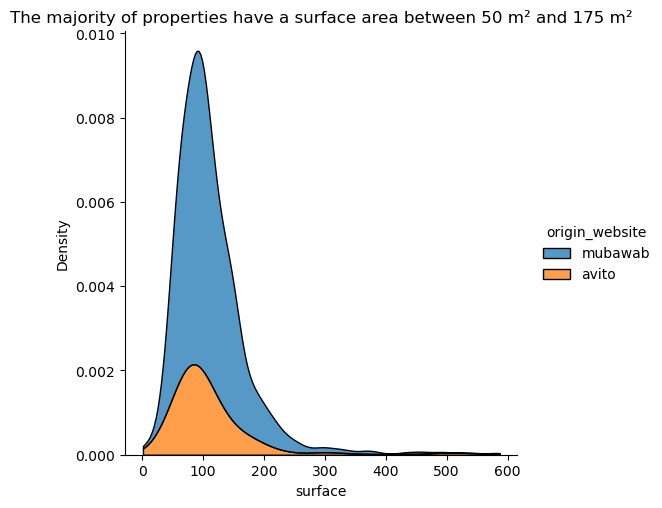

In [284]:
sns.displot(subset, x='surface', hue='origin_website', kind="kde", multiple="stack", cut=0)
plt.title("The majority of properties have a surface area between 50 m² and 175 m²")

let's extract the number of rooms ...

In [285]:
def extract_number_of_rooms(description):
    if isinstance(description, str):
        return int(description.split(";")[1].split()[0])
    return None

In [286]:
# mh_dataset['rooms_number'] = mh_dataset['description'].apply(lambda x: extract_number_of_rooms(x) )

In [287]:
# mh_dataset['rooms_number'].describe()

In [288]:
# sns.displot(mh_dataset, x='rooms_number', hue='origin_website', kind="kde", multiple="stack")
# plt.title("The average number of rooms is 4")
# plt.show()

## 3.10 'complete_description' column cleaning

**Summary :**


In [289]:
mh_dataset['complete_description']

0       Si vous êtes à la recherche d’une résidence ca...
1       Studio très haut standing de 63m² dont 9m² de ...
2       studio de standing, idéalement situé au premie...
3       Excellent appartement voisinage agréable pour ...
4       Il est dans le quartier rouidate à quelques mi...
                              ...                        
3324    propriété titrée située à 40 km de rabat à par...
3325    Salam Je vous propose un appartement pour les ...
3326                PENTHOUSE à louer à MARINA CASABLANCA
3327    Complexe résidentiel sécurisé avec piscine d'a...
3328    Notre Agence Immobilière ... Ouchra Immobilier...
Name: complete_description, Length: 3329, dtype: object

## 3.11 'features_list' column cleaning

**Summary :**

- Add new column "property type"

In [290]:
sum(mh_dataset['features_list'].isna())

0

In [291]:
mh_dataset['features_list']

0       Type de bien;Appartement;Etat ;Nouveau;Standin...
1       Type de bien;Appartement;Etat ;Nouveau;Etat du...
2       Type de bien;Appartement;Etat ;Nouveau;Etat du...
3       Type de bien;Appartement;Etat ;Bon état;Étage ...
4       Type de bien;Appartement;Etat ;Bon état;Etat d...
                              ...                        
3324    Type;Terrains et Fermes, à vendre;Secteur;Tout...
3325    Type;Locations de vacances, à louer;Secteur;Ir...
3326    Type;Appartements, à louer;Secteur;Aïn Diab;Sa...
3327    Type;Appartements, à vendre;Secteur;Sidi Maaro...
3328    Type;Maisons et Villas, à vendre;Secteur;Toute...
Name: features_list, Length: 3329, dtype: object

In [292]:
def extract_property_type(discription):
    if isinstance(discription ,str):
        t = discription.split(";")[1].strip()
        if "," in t:
            return t.split(",")[0].strip()
        return t
    return 'unknown'

In [293]:
mh_dataset['property type'] = mh_dataset['features_list'].apply(lambda x: extract_property_type(x))

In [294]:
unique_property_type_values = mh_dataset['property type'].unique()
unique_property_type_values

array(['Appartement', 'Appartements', 'Locations de vacances',
       'Terrains et Fermes', 'Autre Immobilier', 'Maisons et Villas',
       'Villas et Riads', 'Magasins', 'Bureaux et Plateaux',
       'Colocations'], dtype=object)

In [295]:
mh_dataset['property type'] = mh_dataset['property type'].apply(lambda x: 'Appartement' if x == 'Appartements' else x)

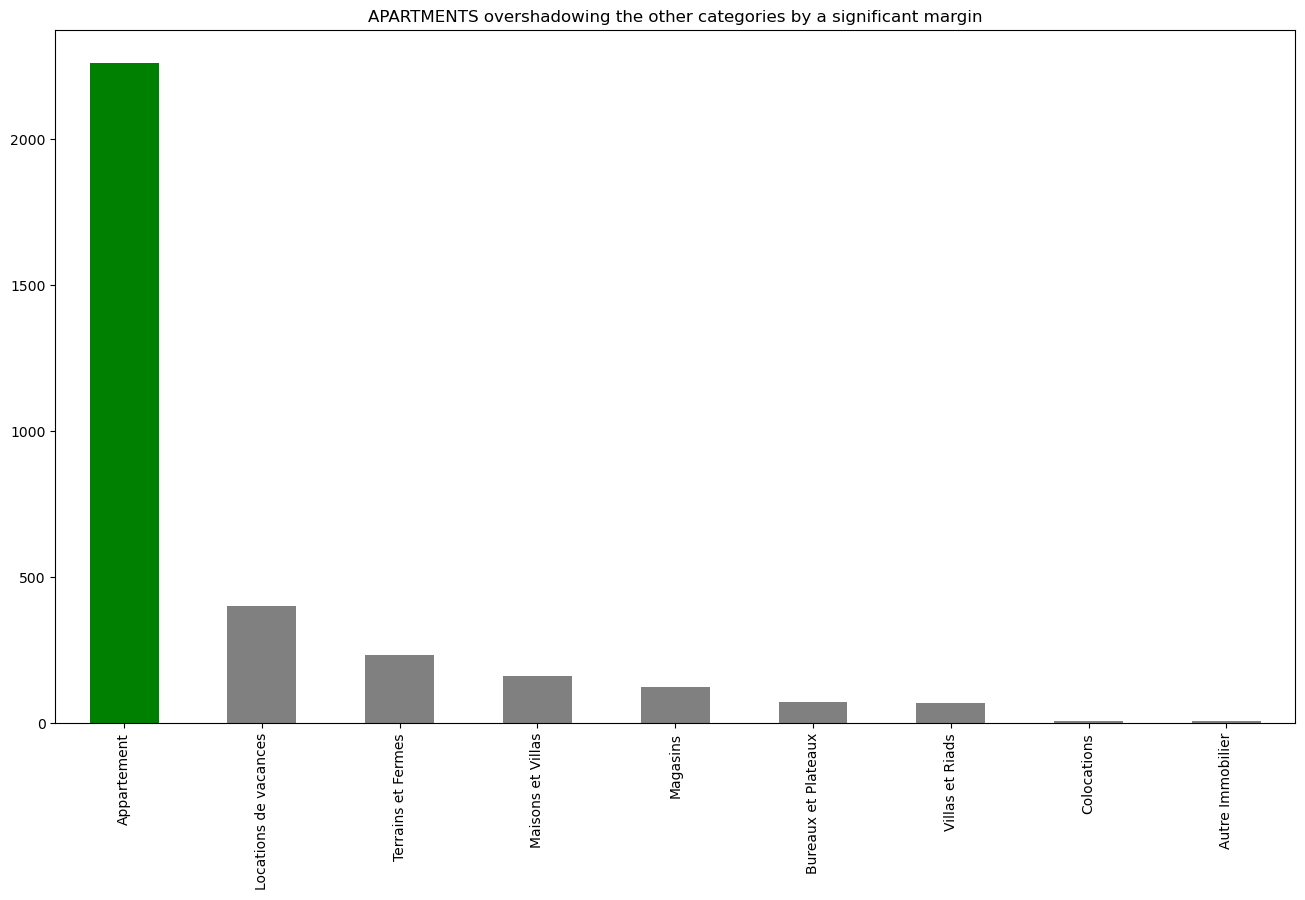

In [296]:
colors = ["g"] + ["gray"] * (len(unique_property_type_values)-1)
mh_dataset['property type'].value_counts().plot(kind="bar", xlabel="", color=colors)
plt.title("APARTMENTS overshadowing the other categories by a significant margin")
plt.show()

# 4. More Cleaning

In [297]:
subset = mh_dataset[["ad category from title", "ad type"]]
subset

,ad category from title,ad type
0,others,unspecified
1,sell,sell
2,others,sell
3,others,sell
4,others,sell
...,...,...
3324,others,unspecified
3325,others,rental
3326,rental,sell
3327,others,sell


In [298]:
subset['ad type'].unique()

array(['unspecified', 'sell', 'rental'], dtype=object)

In [299]:
subset['ad category from title'].unique()

array(['others', 'sell', 'rental'], dtype=object)

In [300]:
mh_dataset["ad_type"] = subset.apply(lambda row: row['ad category from title'] if row["ad type"] == 'unspecified' else row["ad type"], axis=1)

In [301]:
del mh_dataset['ad type']
del mh_dataset['ad category from title']

In [302]:
mh_dataset.head(2)

,advertisement_url,title,publication_date,location,description,complete_description,features_list,insert_date,origin_website,year of publication,month of publication,day of publication,property price,price currency,price per priod (for rental ad),surface,property type,ad_type
0,https://www.mubawab.ma/fr/pa/7476862/apparteme...,Appartement de 100m² en vente Noor Asilah,2024-05-17 23:59:00,Asilah,100 m² ;3 Pièces;2 Chambres;2 Salles de bains,Si vous êtes à la recherche d’une résidence ca...,Type de bien;Appartement;Etat ;Nouveau;Standin...,2024-05-17,mubawab,2024,5,17,NaN,None,NaN,100.0,Appartement,others
1,https://www.mubawab.ma/fr/a/7915969/luxueux-st...,Luxueux studio à vendre 63m² La Ferme Bretonne,2024-05-17 23:59:00,Casablanca,63 m² ;2 Pièces;1 Chambre;1 Salle de bain,Studio très haut standing de 63m² dont 9m² de ...,Type de bien;Appartement;Etat ;Nouveau;Etat du...,2024-05-17,mubawab,2024,5,17,1450000.0,DH,NaN,63.0,Appartement,sell


--------------------------------------------

i am going to replace the property type (preperties who have "Locations de vacances" as property type, but acually we want to know if it's an appartment ot villa or or ... etc) not the type of ad.

In [308]:
a = mh_dataset[mh_dataset['property type'] == "Locations de vacances"]

In [309]:
a.head(2)

,advertisement_url,title,publication_date,location,description,complete_description,features_list,insert_date,origin_website,year of publication,month of publication,day of publication,property price,price currency,price per priod (for rental ad),surface,property type,ad_type
1332,https://www.avito.ma/fr/autre_secteur/location...,appartement a louer par jour,2024-05-19 23:38:00,Fès,NaN,appartement a louer par jour bien équipé et ca...,"Type;Locations de vacances, à louer;Secteur;Au...",2024-05-19,avito,2024,5,19,250.0,DH,Nuit,NaN,Locations de vacances,rental
1338,https://www.avito.ma/fr/quartier_du_parc/locat...,appartement résidence NOVOTEL au parc,2024-05-19 23:43:00,Mohammedia,NaN,Note les prix de locations sont variables selo...,"Type;Locations de vacances, à louer;Secteur;Qu...",2024-05-19,avito,2024,5,19,350.0,DH,Nuit,NaN,Locations de vacances,rental


In [310]:
mh_dataset['property type'].unique()

array(['Appartement', 'Locations de vacances', 'Terrains et Fermes',
       'Autre Immobilier', 'Maisons et Villas', 'Villas et Riads',
       'Magasins', 'Bureaux et Plateaux', 'Colocations'], dtype=object)

In [311]:
def extract_property_type_from_title(title):
    title__ =  title.lower()
    if "apprt" in title__ or "aprt" in title__ or "appartement" in title__ or "appartment" in title__ or "duplex" in title__:
        return 'Appartement'
    elif "terrain" in title__ or "ferme" in title__ or "firm" in title__:
        return 'Terrains et Fermes'
    elif "maison" in title__  or "house" in title__ :
        return 'Maisons et Villas'
    elif "riad " in title__ or "villa" in title__:
        return "Villas et Riads"
    elif "bureau" in title__ or "plateau" in title__:
        return "Bureaux et Plateaux"
    elif "colocation" in title__ :
        return "Colocations"
    elif "magasin" in title__:
        return 'Magasins'
    else:
        return "Autre Immobilier"

In [318]:
b= a.apply(lambda row: extract_property_type_from_title(row['title']), axis=1)

In [325]:
mh_dataset.iloc[a.index]['property type'].value_counts()

property type
Locations de vacances    400
Name: count, dtype: int64

In [326]:
mh_dataset.iloc[a.index]['ad_type'].value_counts()

ad_type
rental    366
others     34
Name: count, dtype: int64

In [333]:
mh_dataset.iloc[a.index, -2] = mh_dataset.iloc[a.index].apply(lambda row: extract_property_type_from_title(row['title']), axis=1)

In [334]:
mh_dataset.iloc[a.index]['property type'].value_counts()

property type
Appartement          199
Autre Immobilier     170
Villas et Riads       27
Maisons et Villas      4
Name: count, dtype: int64

In [335]:
mh_dataset['property type'].value_counts()

property type
Appartement            2458
Terrains et Fermes      234
Autre Immobilier        176
Maisons et Villas       164
Magasins                123
Villas et Riads          96
Bureaux et Plateaux      71
Colocations               7
Name: count, dtype: int64

--------------------------------------------

we are going to specify the property type "Maisons et Villas" and keep all "Maisons" (houses) in this category and replace all "villas" in "Maisons et Villas" category to "Villas et Riads" category.

In [336]:
a = mh_dataset[mh_dataset['property type'] == "Maisons et Villas"]

In [337]:
a.head(2)

,advertisement_url,title,publication_date,location,description,complete_description,features_list,insert_date,origin_website,year of publication,month of publication,day of publication,property price,price currency,price per priod (for rental ad),surface,property type,ad_type
1347,https://www.avito.ma/fr/annakhil/maisons_et_vi...,Villa de 600 m2 sur un terrain de 524 m2,2024-05-19 23:28:00,Marrakech,NaN,FJ Morocco Agency vous propose à la vente : VM...,"Type;Maisons et Villas, à vendre;Secteur;Annak...",2024-05-19,avito,2024,5,19,8500000.0,DH,NaN,NaN,Maisons et Villas,sell
1348,https://www.avito.ma/fr/route_d'amezmiz/maison...,Joli villa vide Neuf avec piscine,2024-05-19 23:29:00,Marrakech,NaN,- JOLI VILLA 4 CHAMBRES VIDE NEUF MODERNE AVEC...,"Type;Maisons et Villas, à louer;Secteur;Route ...",2024-05-19,avito,2024,5,19,20000.0,DH,NaN,NaN,Maisons et Villas,sell


In [340]:
def extarct_villa_or_maison_from_title(title):
    if "villa" in title.lower():
        return "Villas et Riads"
    else:
        return "Maisons"

In [342]:
b = a.apply(lambda row: extarct_villa_or_maison_from_title(row['title']), axis=1)

In [343]:
mh_dataset.iloc[a.index]['property type'].value_counts()

property type
Maisons et Villas    164
Name: count, dtype: int64

In [ ]:
# mh_dataset.iloc[a.index, -2] = mh_dataset.iloc[a.index].apply(lambda row: extract_property_type_from_title(row['title']), axis=1)

In [348]:
mh_dataset.iloc[a.index][['title', 'property type']]

,title,property type
1347,Villa de 600 m2 sur un terrain de 524 m2,Maisons et Villas
1348,Joli villa vide Neuf avec piscine,Maisons et Villas
1364,RBA 1019 - Villa à vendre à Souissi,Maisons et Villas
1417,VILLA NEUVE EN LOCATION VIDE VUE MER,Maisons et Villas
1429,1246 AC - Villa à vendre à Californie,Maisons et Villas
...,...,...
3309,maison semi-finie,Maisons et Villas
3310,Maison familiale,Maisons et Villas
3317,villa Taghazout Bay,Maisons et Villas
3322,عمارة للبيع (titré),Maisons et Villas


as we notice, look at the row "3309" for example, we have a house "maison semi-finie" mentionned as "Maisons et Villas" category.

so we gonna specify the property type.

In [349]:
 mh_dataset.iloc[a.index].apply(lambda row: extarct_villa_or_maison_from_title(row['title']), axis=1)

1347    Villas et Riads
1348    Villas et Riads
1364    Villas et Riads
1417    Villas et Riads
1429    Villas et Riads
             ...       
3309            Maisons
3310            Maisons
3317    Villas et Riads
3322            Maisons
3328            Maisons
Length: 164, dtype: object

In [350]:
mh_dataset.iloc[a.index, -2]

1347    Maisons et Villas
1348    Maisons et Villas
1364    Maisons et Villas
1417    Maisons et Villas
1429    Maisons et Villas
              ...        
3309    Maisons et Villas
3310    Maisons et Villas
3317    Maisons et Villas
3322    Maisons et Villas
3328    Maisons et Villas
Name: property type, Length: 164, dtype: object

In [351]:
mh_dataset.iloc[a.index, -2] = mh_dataset.iloc[a.index].apply(lambda row: extarct_villa_or_maison_from_title(row['title']), axis=1)

In [352]:
mh_dataset.iloc[a.index]['property type'].value_counts()

property type
Villas et Riads    105
Maisons             59
Name: count, dtype: int64

so now we are split and specify these categories.

--------------------------------------------

we are going to get ride of columns that are useless for future analysis.

- title
- description
- complete_description
- features_list
- insert_date

In [353]:
del mh_dataset["title"]
del mh_dataset["description"]
del mh_dataset["complete_description"]
del mh_dataset["features_list"]
del mh_dataset["insert_date"]

we gonna rename our columns :

In [354]:
mh_dataset.columns

Index(['advertisement_url', 'publication_date', 'location', 'origin_website',
       'year of publication', 'month of publication', 'day of publication',
       'property price', 'price currency', 'price per priod (for rental ad)',
       'surface', 'property type', 'ad_type'],
      dtype='object')

In [356]:
columns = [
    'url',
    'ad_date',
    'location',
    'platform_name',
    'ad_year',
    'ad_month',
    'ad_day',
    'price',
    'currency',
    'period_(for rental ads)',
    'surface',
    # 'rooms_number',
    'property_type',
    'ad_type',
]

In [357]:
mh_dataset.columns = columns

In [358]:
mh_dataset

,url,ad_date,location,platform_name,ad_year,ad_month,ad_day,price,currency,period_(for rental ads),surface,property_type,ad_type
0,https://www.mubawab.ma/fr/pa/7476862/apparteme...,2024-05-17 23:59:00,Asilah,mubawab,2024,5,17,NaN,None,NaN,100.0,Appartement,others
1,https://www.mubawab.ma/fr/a/7915969/luxueux-st...,2024-05-17 23:59:00,Casablanca,mubawab,2024,5,17,1450000.0,DH,NaN,63.0,Appartement,sell
2,https://www.mubawab.ma/fr/a/7916043/studio-de-...,2024-05-17 23:59:00,Casablanca,mubawab,2024,5,17,7800.0,DH,NaN,62.0,Appartement,sell
3,https://www.mubawab.ma/fr/a/7916424/vente-appa...,2024-05-17 23:59:00,Casablanca,mubawab,2024,5,17,1500000.0,DH,NaN,124.0,Appartement,sell
4,https://www.mubawab.ma/fr/a/7916833/bel-appart...,2024-05-17 23:59:00,Marrakech,mubawab,2024,5,17,1200000.0,DH,NaN,103.0,Appartement,sell
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3324,https://www.avito.ma/fr/khemisset/terrains_et_...,2024-05-21 18:59:00,Khemisset,avito,2024,5,21,NaN,None,NaN,NaN,Terrains et Fermes,others
3325,https://www.avito.ma/fr/iris/locations_de_vaca...,2024-05-21 18:59:00,Oujda,avito,2024,5,21,250.0,DH,Nuit,NaN,Appartement,rental
3326,https://www.avito.ma/fr/a%C3%AFn_diab/appartem...,2024-05-21 18:59:00,Casablanca,avito,2024,5,21,45000.0,DH,NaN,NaN,Appartement,sell
3327,https://www.avito.ma/fr/sidi_maarouf/apparteme...,2024-05-21 18:59:00,Casablanca,avito,2024,5,21,880000.0,DH,NaN,70.0,Appartement,sell


In [359]:
mh_dataset_subset = mh_dataset[['url','ad_date','location','platform_name','ad_year','ad_month','ad_day','price','currency','period_(for rental ads)','surface']]

In [360]:
mh_dataset_subset = mh_dataset_subset.join(pd.DataFrame({"rooms_number": [0]*mh_dataset.shape[0]}))

In [361]:
mh_dataset = mh_dataset_subset.join(mh_dataset[['property_type', 'ad_type']])

In [28]:
mh_dataset['ad_date'] = mh_dataset['ad_date'].apply(lambda x: x.split()[0])

In [27]:
# mh_dataset.to_csv('market_housing_dateset.csv')